<a href="https://colab.research.google.com/github/nestorsgarzonc/Data-analysis-R/blob/master/Credit_card_approval2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 3- ESTADISTICA DESCRIPTIVA.
## Universidad Nacional de Colombia
* Dayanna Lizeth Arteaga Segovia 
* Nestor Sebastian Garzón Contreras
* Juan Felipe Torres Manrique

#Importar librerias necesarias

## Descargar paquetes

Al instalar los paquetes puede tardar aproximadamente 5 minutos

Nota: mnormt es una dependencia del paquete psych, se instala una version anterior por compatibilidad de version con la 2.0 de mnormt.



In [ ]:
packageurl <- "https://cran.r-project.org/src/contrib/Archive/mnormt/mnormt_1.5-7.tar.gz"
install.packages(packageurl, repos=NULL, type="source")

In [ ]:
install.packages("psych", repos='https://www.icesi.edu.co/CRAN/')
install.packages("dplyr")   #Resumenes estadisticos
install.packages("ggplot2") #Graficos en general
install.packages('RCurl')   #Paquete para obtener archivos desde internet
install.packages("modeest") #Calcular moda
install.packages("dplyr")   #Agrupar datos
install.packages("fdth")    #Graficos descriptivos
install.packages("ggpubr")  #Grafico de medias

##Cargar paquetes

In [ ]:
library("ggplot2")
library("psych")
library("dplyr")
library ("RCurl")
library ("modeest")
library("fdth")
library("ggpubr")

# Cargar dataset

Nota: el dataset original tenia un problema de interpretacion en colab, por ello se modifico la codificacion y esta disponible ambas versiones en el siguiente repositorio: https://github.com/nestorsgarzonc/Data-analysis-R

In [4]:
#download <- getURL("https://raw.githubusercontent.com/nestorsgarzonc/Data-analysis-R/master/Base_Banco.csv")
#data <- read.table (text = download, sep = ';', fileEncoding = "UCS-2LE")

In [5]:
#head(data)

In [6]:
#dim(data)

In [7]:
#colnames(data) <- as.character(unlist(data[1,]))
#data = data[-1, ]

Importar dataframe modificado, se descarga el dataset alojado en GitHub usando el metodo:

```
getURL('URL')
```

Como la primera columna del dataset (X) es el indice del dataset, se define como el index del dataframe
```
read.csv(row.names='X')
```





In [8]:
download <- getURL("https://raw.githubusercontent.com/nestorsgarzonc/Data-analysis-R/master/banco_dataframe.csv")
BaseBanco <- read.csv(text = download, row.names = 'X')

#Exploracion de datos

Las variables estan definidas de la siguiente manera


1.   **Edad**: Edad en años del cliente.
2.   **Ocupación**: Ocupación del cliente.
3.   **Est_civil**: Estado civil del cliente.
4. **Nivel_educativo**: Máximo nivel escolar alcanzado por el cliente.
5. **Contrato_meses**: Duración del último o actual contrato de trabajo del cliente.
6. **Cred_hipotecario**: Si el cliente tiene o no crédito hipotecario vigente con el banco.
7. **Cred_personal**: Si el cliente tiene o no crédito personal vigente con el banco.
8. **Medio_contacto**: Medio por el cual se contactó al cliente.
9. **Día**: Día del mes en el que se realizó el último contacto con el cliente.
10. **Mes**: Mes del año en el que se realizó el último contacto con el cliente.
11. **Duración_seg**: Duración en segundos del último contacto con el cliente.
12. **Cont_campaña_actual**: Número de veces que se contactó al cliente en la campaña mencionada.
13. **Campañas_previas**: Número de campañas de promoción en las que se ha incluido al cliente previamente.
14. **Aceptación_TC**: Si el cliente aceptó o no la tarjeta de crédito en la campaña mencionada.

A continuacion se realiza la inspeccion de las 5 primeras y 5 ultimas columnas del dataset

In [9]:
head(BaseBanco)

,edad,ocupación,est_civil,nivel_educativo,contrato_meses,Cred_hipotecario,Cred_personal,Medio_contacto,Dia,Mes,duracion_seg,cont_campaña_actual,campañas_previas,aceptacion_TC
,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>
0,30,desempleado,casado,primaria,21,no,no,celular,19,octubre,79,1,0,no
1,33,profesor,casado,bachillerato,37,si,si,celular,11,mayo,220,1,4,no
2,35,administrador,soltero,universitario,52,si,no,celular,16,abril,185,1,1,no
3,30,administrador,casado,universitario,27,si,si,chat,3,junio,199,4,0,no
4,59,informal,casado,bachillerato,6,si,no,chat,5,mayo,226,1,0,no
5,35,administrador,soltero,universitario,29,no,no,celular,23,febrero,141,2,3,no


In [10]:
tail(BaseBanco)

,edad,ocupación,est_civil,nivel_educativo,contrato_meses,Cred_hipotecario,Cred_personal,Medio_contacto,Dia,Mes,duracion_seg,cont_campaña_actual,campañas_previas,aceptacion_TC
,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>
4515,32,profesor,soltero,bachillerato,69,si,no,celular,7,julio,624,5,0,no
4516,33,profesor,casado,bachillerato,10,si,no,celular,30,julio,329,5,0,no
4517,57,independiente,casado,universitario,59,si,si,chat,9,mayo,153,1,0,no
4518,57,empresario,casado,bachillerato,40,no,no,celular,19,agosto,151,11,0,no
4519,28,informal,casado,bachillerato,59,no,no,celular,6,febrero,129,4,3,no
4520,44,emprendedor,soltero,universitario,49,si,si,celular,3,abril,345,2,7,no


In [11]:
dim(BaseBanco)

[1] 4521   14

Nuestro dataset esta conformado de 4521 filas y 14 columnas las cuales son estan distribuidas de la siguiente manera

In [12]:
str(BaseBanco)

'data.frame':	4521 obs. of  14 variables:
 $ edad               : int  30 33 35 30 59 35 36 39 41 43 ...
 $ ocupación          : Factor w/ 11 levels "administrador",..: 4 11 1 1 9 1 8 6 5 11 ...
 $ est_civil          : Factor w/ 3 levels "casado","divorciado",..: 1 1 3 1 1 3 1 1 1 1 ...
 $ nivel_educativo    : Factor w/ 4 levels "bachillerato",..: 2 1 4 4 1 4 4 1 4 2 ...
 $ contrato_meses     : int  21 37 52 27 6 29 38 42 67 62 ...
 $ Cred_hipotecario   : Factor w/ 2 levels "no","si": 1 2 2 2 2 1 2 2 2 2 ...
 $ Cred_personal      : Factor w/ 2 levels "no","si": 1 2 1 2 1 1 1 1 1 2 ...
 $ Medio_contacto     : Factor w/ 3 levels "celular","chat",..: 1 1 1 2 2 1 1 1 2 1 ...
 $ Dia                : int  19 11 16 3 5 23 14 6 14 17 ...
 $ Mes                : Factor w/ 12 levels "abril","agosto",..: 11 9 1 7 9 5 9 9 9 1 ...
 $ duracion_seg       : int  79 220 185 199 226 141 341 151 57 313 ...
 $ cont_campaña_actual: int  1 1 1 4 1 2 1 2 2 1 ...
 $ campañas_previas   : int  0 4 1 0 0 3 2 0 0

El dataset esta conformado por 14 variables las cuales 6 son cuantitativas y 8 son cualitativas.
Las variables cualitativas estan definidas como factores y tienen las siguientes clases:

In [13]:
#Ocupacion
unique(BaseBanco$`ocupación`)

[1] desempleado     profesor        administrador   informal       
 [5] independiente   empresario      emprendedor     estudiante     
 [9] amadiciembreasa pensionado      desconocido    
11 Levels: administrador amadiciembreasa desconocido ... profesor

In [14]:
#Estado civil
unique(BaseBanco$est_civil)

[1] casado     soltero    divorciado
Levels: casado divorciado soltero

In [15]:
#Nivel educativo
unique(BaseBanco$nivel_educativo)

[1] primaria      bachillerato  universitario técnico      
Levels: bachillerato primaria técnico universitario

In [16]:
#Medio de contacto
unique(BaseBanco$Medio_contacto)

[1] celular  chat     telefono
Levels: celular chat telefono

In [17]:
#Mes
unique(BaseBanco$Mes)

[1] octubre    mayo       abril      junio      febrero    agosto    
 [7] enero      julio      noviembre  septiembre marzo      diciembre 
12 Levels: abril agosto diciembre enero febrero julio junio marzo ... septiembre

Las siguientes variables categoricas tienen salida binaria, si o no

In [18]:
#Credito hipotecario
unique(BaseBanco$Cred_hipotecario)
#Credito personal
unique(BaseBanco$Cred_personal)
#Aceptacion de la tarjeta de credito
unique(BaseBanco$aceptacion_TC)

[1] no si
Levels: no si

[1] no si
Levels: no si

[1] no si
Levels: no si

A continuacion vamos a desestructurar el dataframe en variables para mayor comodidad y renombrar algunas variables que contienen simbolos como tildes, ñ y demas para seguir una misma convencion 👨‍💻👩‍💻

In [19]:
attach(BaseBanco)

In [20]:
colnames(BaseBanco)

[1] "edad"                "ocupación"           "est_civil"          
 [4] "nivel_educativo"     "contrato_meses"      "Cred_hipotecario"   
 [7] "Cred_personal"       "Medio_contacto"      "Dia"                
[10] "Mes"                 "duracion_seg"        "cont_campaña_actual"
[13] "campañas_previas"    "aceptacion_TC"

In [21]:
ocupacion            <- `ocupación`
cred_hipotecario     <- Cred_hipotecario
cred_personal        <- Cred_personal
medio_contacto       <- Medio_contacto
dia                  <- Dia
mes                  <- Mes
cont_campana_actual  <- `cont_campaña_actual`
campanas_previas     <- `campañas_previas`

#Analisis datos

##Análisis del perfil objetivo del Banco

### Variables cuantitativas

Las variables cuantitativas a usar son:


1.   edad
2.   contrato_meses
3.   campanas_previas


####Edad

In [22]:
#Tendencia central y posicion
paste('Media:', mean(edad))
paste('Mediana:', median(edad))
paste('Moda:', mfv(edad))
print('Cuartiles:')
quantile(edad) 

[1] "Media: 41.170095111701"

[1] "Mediana: 39"

[1] "Moda: 34"

[1] "Cuartiles:"


0%  25%  50%  75% 100% 
  19   33   39   49   87

Podemos ver que la edad va desde los 19 años hasta los 87 años, la media de la edad es de 41 años con al parecer presencia de datos atípicos y la moda es de 34 años.

Debido a la presencia de datos atipicos se procede a analizar la media recortada para reducir la inestabilidad

In [23]:
paste('Media con media recortada al 20%: ', mean(edad, trim=0.2))

[1] "Media con media recortada al 20%:  39.969037965352"

Ahora la media es mucho más cercana a la mediana que es una medida robusta y se puede concluir que la edad media de la base es de 39-40 años

Para la dispersión podemos usar el rango intercuartílico el cual es una medida robusta, es decir no se va a dejar afectar por los datos atípicos

In [24]:
#Dispersion:
paste('Rango intercuartilico de la edad:', IQR(edad))

[1] "Rango intercuartilico de la edad: 16"

Entonces el 50% central de los datos de la edad tienen una dispersión de 16 años, y si lo comparamos con la mediana

In [25]:
summary(BaseBanco$edad)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   33.00   39.00   41.17   49.00   87.00 

Observamos que el primer cuartil se encuentra más cerca de la mediana que el tercer cuartil, esto quiere decir que el primer 25% central de los datos es menos disperso que el segundo 25% central. Además podemos observar que la mediana se encuentra más cerca al mínimo que al máximo, esto quiere decir que el primer 50% de los datos es menos disperso que el segundo.

In [26]:
paste('Asimetria de la edad: ', skew(edad))
paste('Curtosis de la edad: ', kurtosi(edad))

[1] "Asimetria de la edad:  0.699037353618127"

[1] "Curtosis de la edad:  0.345582521903384"

La edad de los clientes tiene una asimetría positiva, es decir, los datos alejados de la media se encuentran a la derecha. Y respecto a la curtosis podemos afirmar que su distribución es leptocúrtica, es decir tiene baja dispersión con respecto a la media.

Estas caracteristicas halladas de tendencia central, forma, posición, dispersión y asimetría, se pueden ver resumidas tanto en la distribución de frecuencias como en el Boxplot

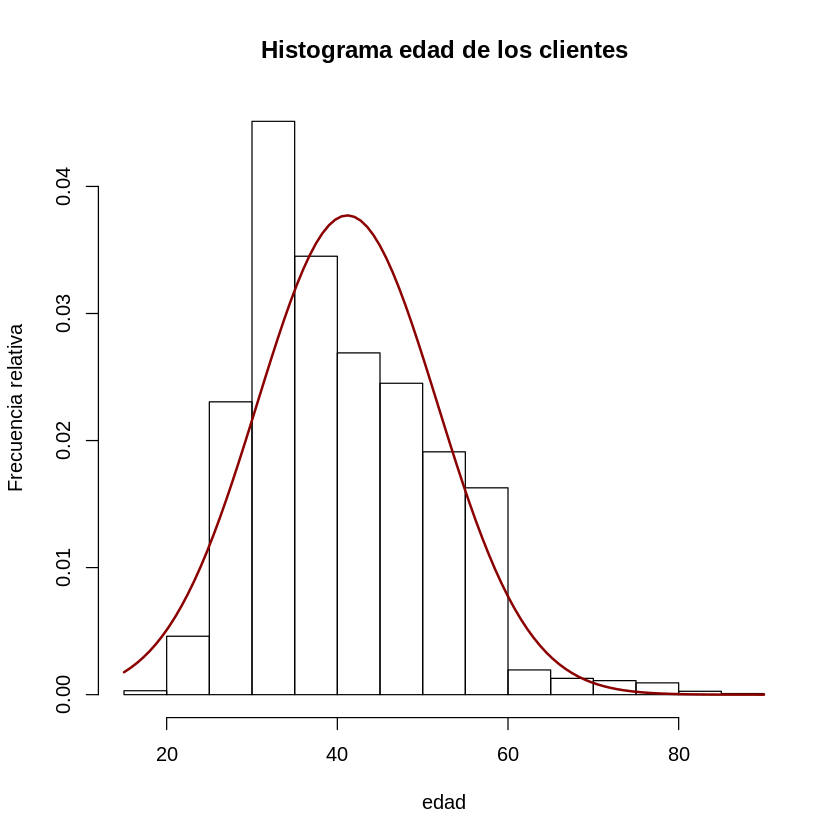

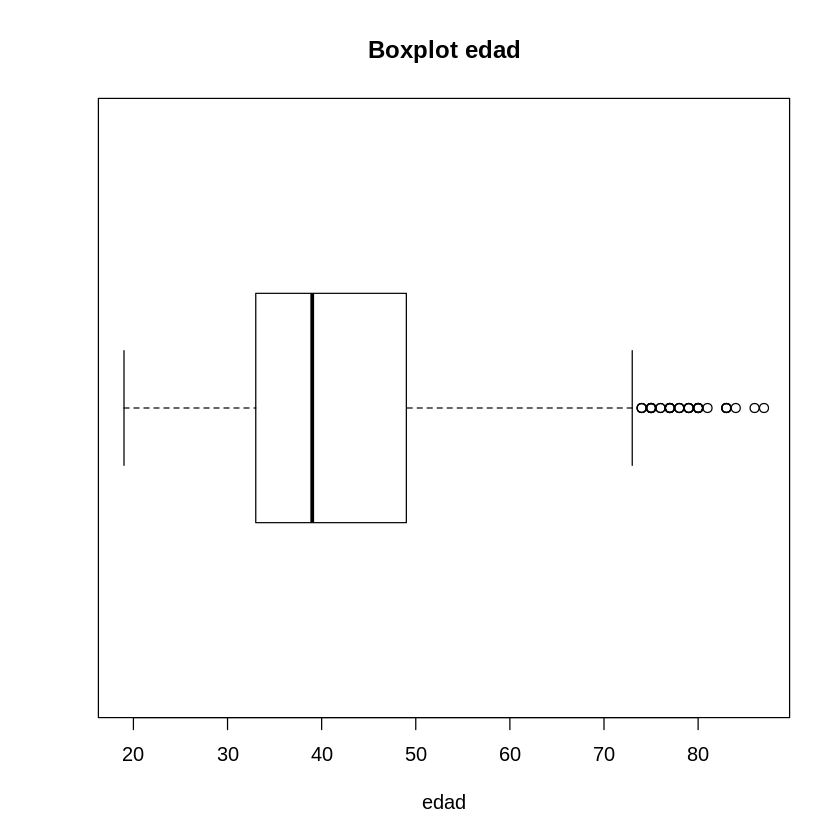

In [27]:
hist(edad, freq = F, main = "Histograma edad de los clientes", xlab = "edad", ylab="Frecuencia relativa")
curve(dnorm(x,mean=mean(edad),sd=sd(edad)), col="darkred",lwd=2, add=TRUE)
diagrama_edad <- boxplot(edad, main = "Boxplot edad", horizontal = TRUE, xlab = "edad" )

In [28]:
print('Valores del Boxplot:') 
diagrama_edad$stats
print('Lista de edades atípicas:')
total_edad_out <- sum(diagrama_edad$out>73)
diagrama_edad$out
paste('Número de datos atípicos:', total_edad_out)

[1] "Valores del Boxplot:"


[,1]
[1,]   19
[2,]   33
[3,]   39
[4,]   49
[5,]   73
attr(,"class")
          
"integer"

[1] "Lista de edades atípicas:"


[1] 78 77 78 75 75 77 81 83 80 77 75 80 83 75 79 77 86 78 77 74 80 74 80 80 75
[26] 76 79 77 87 79 76 80 79 74 75 84 83 83

[1] "Número de datos atípicos: 38"

Además con el Boxplot podemos ver esos datos atípicos. Observamos que en la base hay 38 clientes con edades fuera de lo común pues sus edades son mayores a los 73 años.

####Contrato por meses

El contrato a meses es la duracion del actual o ultimo contrato de trabajo del cliente.

In [29]:
#Tendencia central y posicion
paste('Media:', mean(contrato_meses))
paste('Mediana:', median(contrato_meses))
paste('Moda:', mfv(contrato_meses))
print('Quantiles:')
quantile(contrato_meses) 

[1] "Media: 36.2720637027206"

[1] "Mediana: 36"

[1] "Moda: 52"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   1   18   36   54   72

Este va desde 1 hasta 72 meses, por lo que se puede suponer que todos los clientes han tenido un contrato de trabajo de al menos un mes o que, así no lo hayan tenido, se les aproxima a un valor de 1 por facilidad.

Además vemos que la moda son 52 meses y en general los clientes tienen un contrato de 36 meses, este valor de la media es muy cercano al de la mediana 

Para la dispersión no tenemos indicios de datos atípicos por lo que podemos calcularla con la desviación de la media.

In [30]:
#Dispersion:
paste('Varianza de los contrato_meses', var(contrato_meses))

[1] "Varianza de los contrato_meses 429.754283549923"

In [31]:
paste('Entonces en promedio, el contrato por meses de los clientes está desviado de la media muestral: ', 
      sd(contrato_meses), 'meses')

[1] "Entonces en promedio, el contrato por meses de los clientes está desviado de la media muestral:  20.7305157569686 meses"

In [32]:
limiteSup<-mean(contrato_meses)+sd(contrato_meses)
limiteInf<-mean(contrato_meses)-sd(contrato_meses)
paste('El contrato por meses de los clientes que estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)
total_contrato <- sum(contrato_meses>limiteInf & contrato_meses<limiteSup)
paste('Número de datos a menos de 1 desviación de la media:', total_contrato)
n_contrato <- length(contrato_meses)
paste('Porcentaje de datos a menos de 1 desviación de la media:', total_contrato/n_contrato)

[1] "El contrato por meses de los clientes que estan a una desviacion estandar de la media son:"

[1] "X-s:  15.541547945752"

[1] "X+s:  57.0025794596892"

[1] "Número de datos a menos de 1 desviación de la media: 2653"

[1] "Porcentaje de datos a menos de 1 desviación de la media: 0.586817075868171"

Observamos que hay una gran desviación respecto a la media, de hecho solo el 58.68% de los datos se encuentran a menos de una desviación de la media. Podemos afirmar que los datos se encuentran bastante dispersos respecto a la media.

In [33]:
paste('Asimetria: ', skew(contrato_meses))
paste('Curtosis: ', kurtosi(contrato_meses))

[1] "Asimetria:  0.012156707701867"

[1] "Curtosis:  -1.21561298993624"

La asimetria es positiva cercana a cero, es decir, la cola derecha es levemente más larga y la curtosis es negativa por ende es platicurtica, confirmando que los datos se encuentran bastante dispersos respecto a la media.

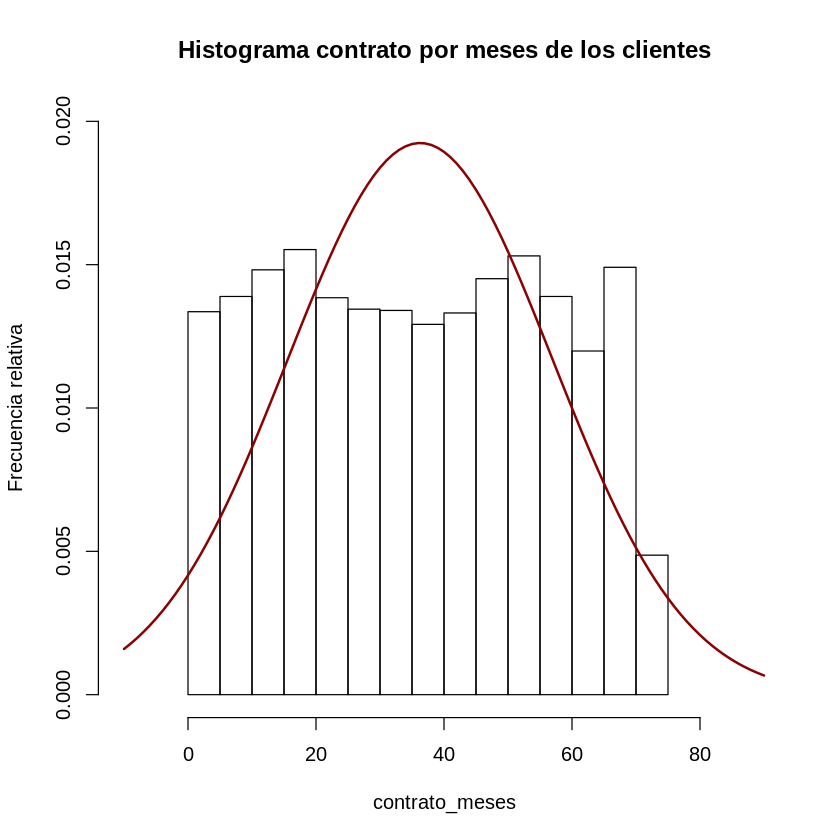

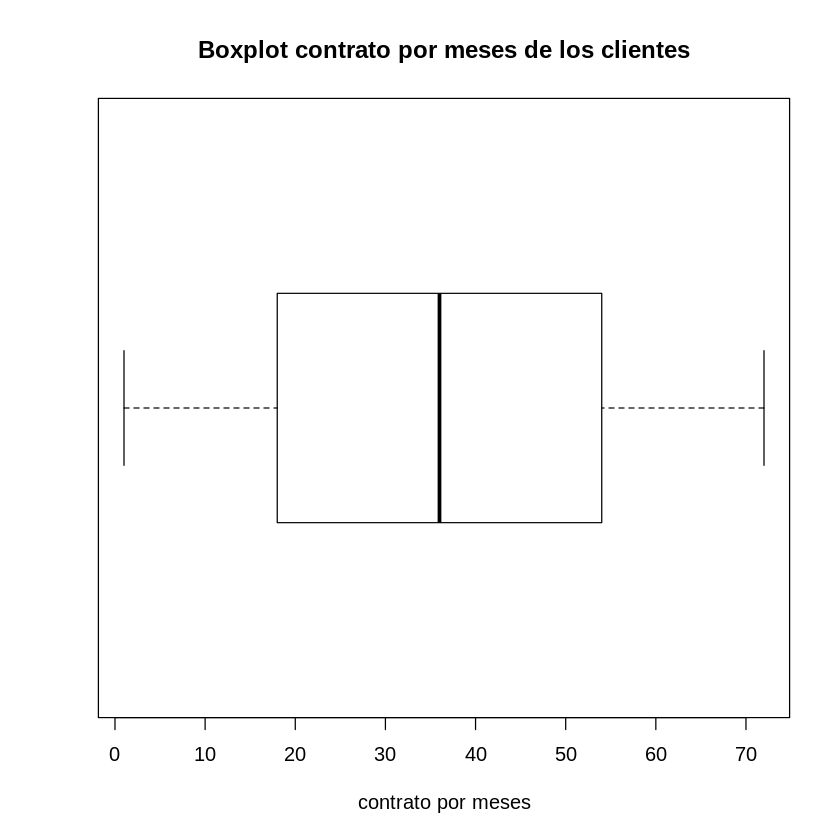

In [34]:
hist(contrato_meses, freq = F, main = "Histograma contrato por meses de los clientes", xlab = "contrato_meses", ylab="Frecuencia relativa", xlim=range(-10, 90), ylim=range(0, 0.02) )
curve(dnorm(x,mean=mean(contrato_meses),sd=sd(contrato_meses)), col="darkred",lwd=2, add=TRUE)
diagrama_contrato_meses <- boxplot(contrato_meses, main = "Boxplot contrato por meses de los clientes", horizontal = TRUE, xlab = "contrato por meses" )

In [35]:
diagrama_contrato_meses$stats

[,1]
[1,]    1
[2,]   18
[3,]   36
[4,]   54
[5,]   72
attr(,"class")
          
"integer"

Como observamos no hay presencia de datos atípicos y hay una ligera asimetría positiva, sin embargo en general podriamos decir que los cuartiles tienen una dispersión muy cercana entre si.

####Campañas previas

Es el número de campañas de promoción en las que se ha incluido al cliente previamente.

In [36]:
#Tendencia central y posicion
paste('Media:', mean(campanas_previas))
paste('Mediana:', median(campanas_previas))
paste('Moda:', mfv(campanas_previas))
print('Quantiles:')
quantile(campanas_previas) 

[1] "Media: 0.542579075425791"

[1] "Mediana: 0"

[1] "Moda: 0"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   0    0    0    0   25

Va desde 0 hasta 25 campañas previas, observamos que el 75% de los datos o más no han sido contactados previamente en campañas previas, por lo que tenemos una mediana de 0, sin embargo la media es 0.54, lo que nos índica presencia de datos atípicos

In [37]:
paste('Media con media recortada al 20%: ', mean(campanas_previas, trim=0.2))

[1] "Media con media recortada al 20%:  0"

Si recortamos la media al 20% eliminamos esos datos atípicos y se vuelve igual a la mediana

Para la dispersión volveremos a usar la medida robusta del rango intercuartílico

In [38]:
#Dispersion:
paste('Rango intercuartilico de la campana_previas', IQR(campanas_previas))

[1] "Rango intercuartilico de la campana_previas 0"

Observamos que el 50% de los datos centrales tiene una dispercion aproximada de 0 contactos en campañas previas

In [39]:
paste('Asimetria: ', skew(campanas_previas))
paste('Curtosis: ', kurtosi(campanas_previas))

[1] "Asimetria:  5.87136060735109"

[1] "Curtosis:  51.9120982948904"

Hay una gran asimetria positiva lo que significa que la cola esta bien alargada a la derecha, además la forma de su distribución es leptocúrtica, es decir los datos estan muy agrupados con respecto a la media

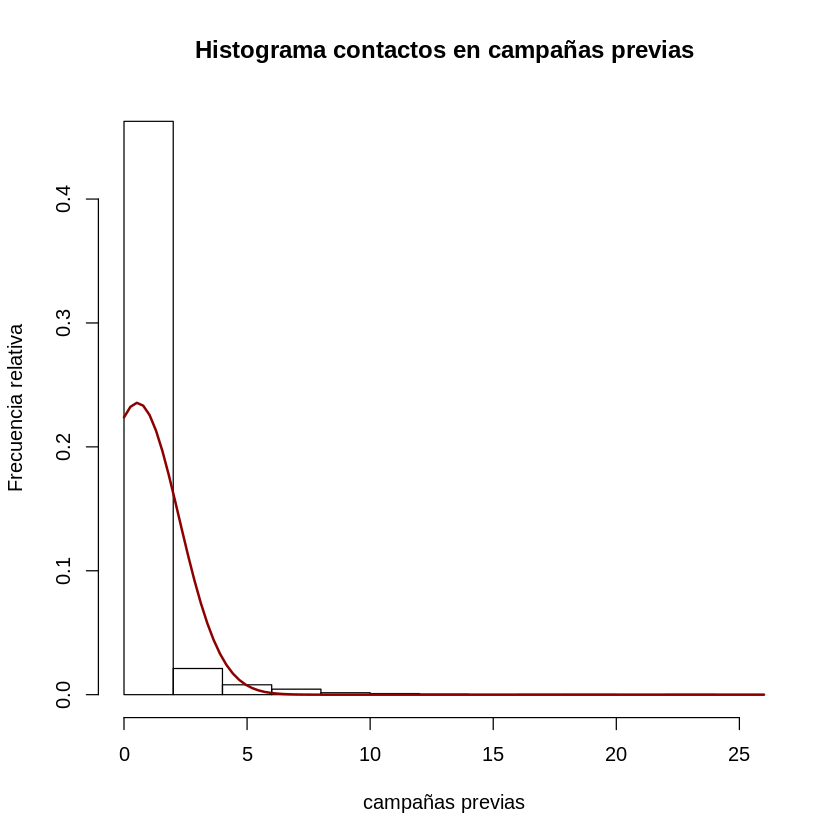

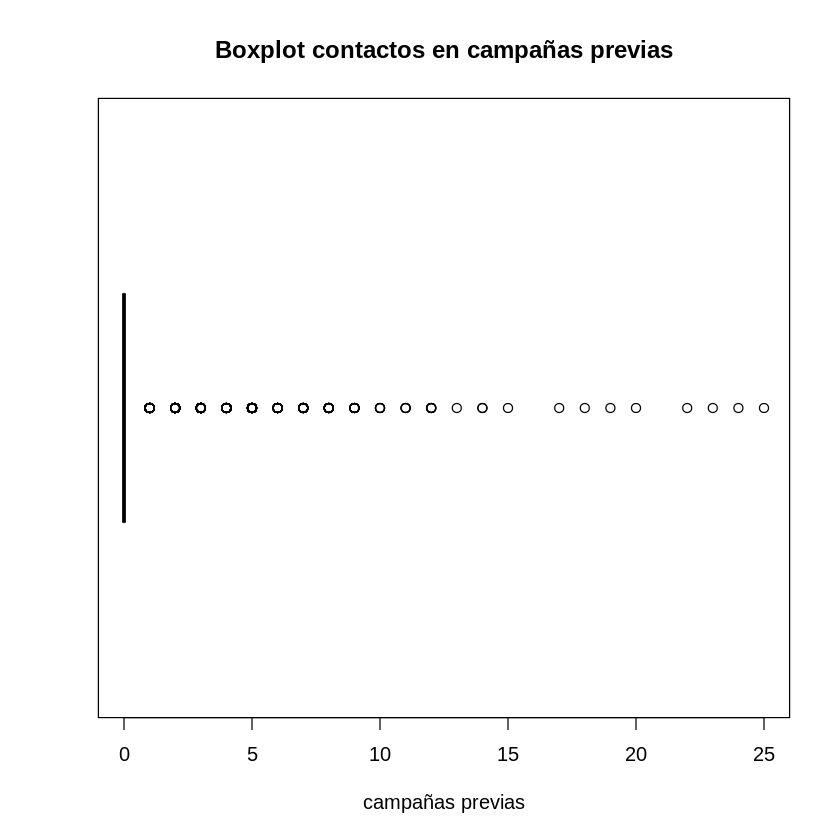

In [40]:
hist(campanas_previas, freq = F, main = "Histograma contactos en campañas previas", xlab = "campañas previas", ylab="Frecuencia relativa")
curve(dnorm(x,mean=mean(campanas_previas),sd=sd(campanas_previas)), col="darkred",lwd=2, add=TRUE)
diagrama_campanas_previas <- boxplot(campanas_previas, main = "Boxplot contactos en campañas previas", horizontal = TRUE, xlab = "campañas previas" )

In [41]:
print('Valores del Boxplot:') 
diagrama_campanas_previas$stats
print('Lista de contactos en campañas previas atípicos:')
total_campanas_previas_out <- sum(diagrama_campanas_previas$out>0)
diagrama_campanas_previas$out
paste('Número de datos atípicos:', total_campanas_previas_out)

[1] "Valores del Boxplot:"


[,1]
[1,]    0
[2,]    0
[3,]    0
[4,]    0
[5,]    0
attr(,"class")
          
"integer"

[1] "Lista de contactos en campañas previas atípicos:"


[1]  4  1  3  2  2  1  2  1  2  2  3  2  1  1  5  3  1  1  2 20  1  7  3  3  1
 [26]  6  3  2  2  1  2  3  2  4  1  1  4  2  1  2  2  3  1  1  1  1  2  1  6 10
 [51]  5  2  1  5  2  2  3  1  6  5  1  2  2  1  1  3  3  5  1  1  1  2  1  2  4
 [76]  2  1  4  9  4  1  4  1  2  1  1  2  1  1  2  3  4  2  5  4  2  5  2  1  1
[101]  2  5  4  2  2  4  2  4  3  1  7  1  1  1  2  8  1  2  4  1  4  3  2  3  2
[126]  3  2  3  1  1  1  3  8  1  1  1  2  2  8  4  3  4  8  9  8  1  1  8  4  2
[151]  6  1  5  2  1 18  4  2  1  2  1  8  2  1  3  5  3  2  1 19  1  7  1  2  3
[176]  2  2  1  2  2  1  2  2  2  2  2  3  2  1  1  2  1  5  5  3  3  3  3  2  2
[201]  3  1  3  2  2  1  2  2  1  1 12  5  3  8  1  3  3  2  3  1  1  5  1  1  6
[226]  1  3  6  3  1  1  1  3  4  1  1  7  2  1  2  1  2  3  3  5  4  1  1  3 12
[251]  7  2  4  5  1  2  2  2  2  1  7  1  4  5  1  1  1  1  3  1  4  2  6  2  1
[276]  1  3  2  3  2  1 12  3  2  4  1  4  1  1 12  2  4  1  3 13  1  5  2  3  1
[301]  1  2  2 12  1  1  6  3  1  2  1  1  4  2  1  3  2  1  7  5  1  7  2  1  2
[326]  1  3  2  5  2  2  1  3  2  1  1  1  5  3  1  3  1  2  1  7  1  2  2  1  2
[351]  2  2  5  7  4  7  1  1  3  1  8  2  7  7  2  3  1  3  2  1  1  1  1  1  6
[376]  3  2  3 10  2  1  1  4  5  3 11  1  1  3  2  1  1  4  2  4  4  2  4  8 14
[401]  4  2  1  3  4  2  7  5  1  3  2  1  1  3  3  1 10  6  3  2  1  1  9  3  2
[426]  3  3  2  2  2  1  5  1  1  4  2  2  4  1  1  1  2  4  4 10  3  4  6  7  3
[451]  3  1  1  9  2  5  1  1  2  4  1  8  1  1  5  4  2  1  6  2  1  1  1  5  7
[476]  1  1  4  3  4  1  8  1  4  1  8  2  1  4  2  3  4  3  2  1  2  2  4  1  1
[501]  1  2  1  2  3  1  4  1  6  1  1  2  2  3  4  1  4  1  1  1  1  3  4  1  5
[526]  1  9  1  1  2  1 11  2  8  1  3  2  2  1  2  5  1  3  5  6  3  2  3  1  3
[551]  1  2  4  4  2  1  1  1  2  3  5  5  2  3  3  7  1  9  1  1  3  6  3  2  1
[576]  4 15  1  3  1  1  3  1  2  1  5  3  6  2  2  1  4  9  6  3  2  6  1  2  7
[601]  1  4  2  3  2  3  5  3  6  2  4 24  1  2  3  5  1  2  1 17  1  1  2  1  1
[626]  1  5  4  6  6  9  1  1  5  1  4  1  9  1  3  4  1  1  1  8  2  5  4  3  1
[651]  2  1  1  1  8  5  4  3  3 22  2  1  1  3  2  8  5  2  8  2  2  3  1  1  2
[676]  2  1  2  1  2  1  1  4  1  5  1  7  2  1  1  2  2  3  1  1  2  1  2  2  1
[701]  1  1  4  1  6  3  9  3  4  1  2  1  3  2  4  1  5  1  1  2  1  5  1  2  2
[726]  1  1  1  2  5  3  1  4  2  3  2  1 23  5  1  4  2  1  1  1  3  1  2  4  7
[751] 14  2  1  1  4  4  2  1  1  6  4  6  1  1  1  4  6  1  2  1  1  7  1  2  3
[776]  1  1  3  1  3  3  1  1  1  1  2  2  1  2  2  4  2 25  1  2  1  2  1  1  2
[801]  2  2  1  1 11  4  4  2  5  1  3  3  4  1  3  7

[1] "Número de datos atípicos: 816"

Observamos que cualquier número de contactos en campañas previas mayor a 0 es un dato atípico, por lo que hay 816 datos atípicos

###Variables cualitativas

Las variables cualitativas a usar son:

 * ocupación          
 * est_civil          
 * nivel_educativo    
 * Cred_hipotecario  
 * Cred_personal     
 * Medio_contacto

####Ocupacion

Por ocupacion, la mayor proporcion de clientes esta dada por administradores, informales y empresarios.

In [42]:
Tabla_ocupacion <- table(ocupacion)
Tabla_ocupacion

ocupacion
  administrador amadiciembreasa     desconocido     desempleado     emprendedor 
            969             112              38             128             168 
     empresario      estudiante   independiente        informal      pensionado 
            768              84             661             946             230 
       profesor 
            417 

In [43]:
prop.table(Tabla_ocupacion)

ocupacion
  administrador amadiciembreasa     desconocido     desempleado     emprendedor 
     0.21433311      0.02477328      0.00840522      0.02831232      0.03715992 
     empresario      estudiante   independiente        informal      pensionado 
     0.16987392      0.01857996      0.14620659      0.20924574      0.05087370 
       profesor 
     0.09223623 

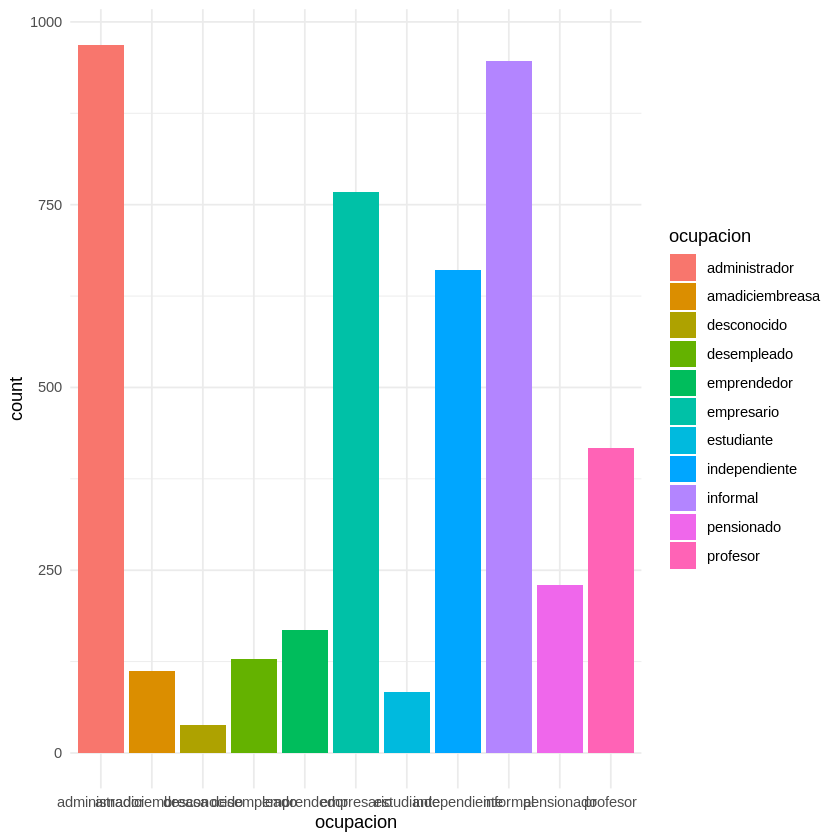

In [44]:
barras_ocupacion <- ggplot(BaseBanco,aes(x=ocupacion, fill=ocupacion))+geom_bar()+theme_minimal()
barras_ocupacion

####Estado civil

Se observa que la mayoría de los clientes en la base estan casados actualmente

In [45]:
Tabla_est_civil <- table(est_civil)
Tabla_est_civil

est_civil
    casado divorciado    soltero 
      2797        528       1196 

In [46]:
prop.table(Tabla_est_civil)

est_civil
    casado divorciado    soltero 
 0.6186684  0.1167883  0.2645432 

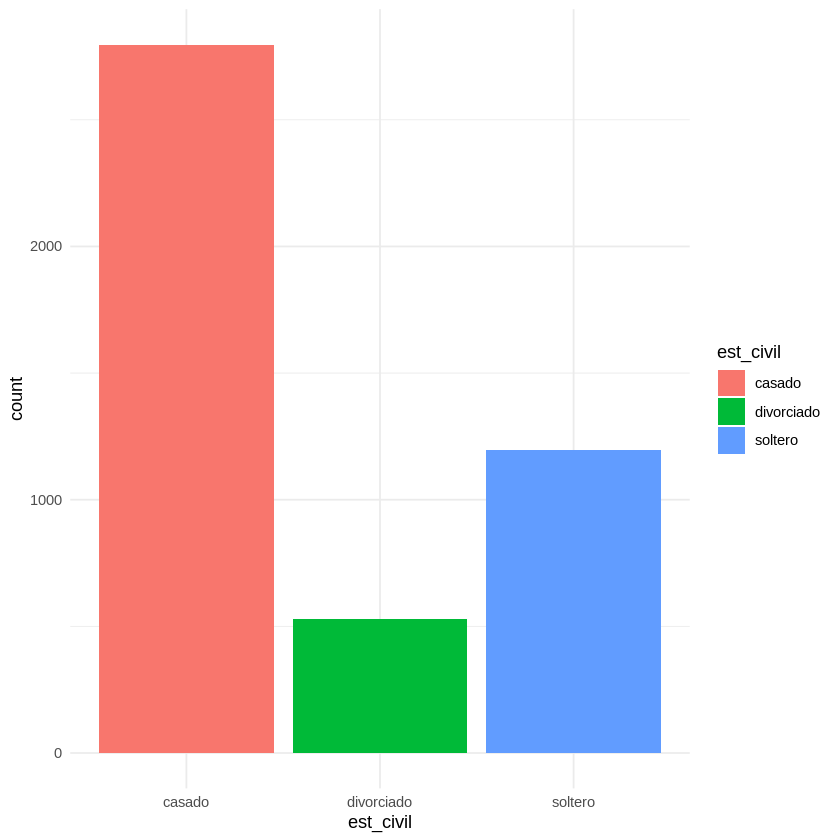

In [47]:
barras_est_civil <- ggplot(BaseBanco,aes(x=est_civil, fill=est_civil))+geom_bar()+theme_minimal()
barras_est_civil

####Nivel educativo

Para el nivel educativo la mayor proporcion de personas esta dada por personas de bachilleres y universitarios

In [48]:
Tabla_nivel_educativo <- table(nivel_educativo)
Tabla_nivel_educativo

nivel_educativo
 bachillerato      primaria       técnico universitario 
         2306           678           187          1350 

In [49]:
prop.table(Tabla_nivel_educativo)

nivel_educativo
 bachillerato      primaria       técnico universitario 
   0.51006415    0.14996682    0.04136253    0.29860650 

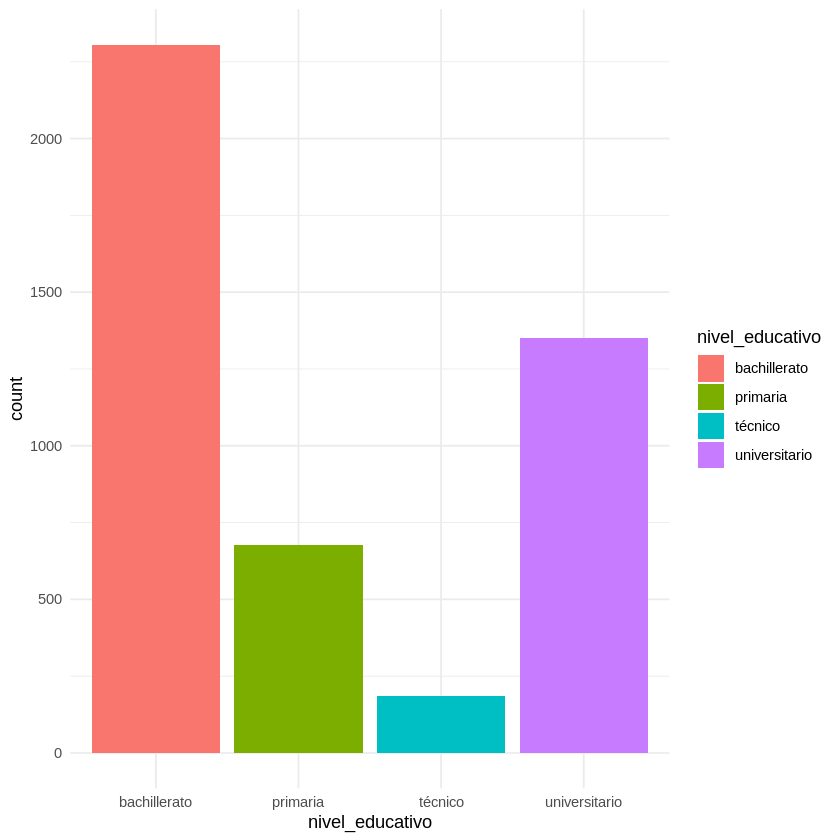

In [50]:
barras_nivel_educativo <- ggplot(BaseBanco,aes(x=nivel_educativo, fill=nivel_educativo))+geom_bar()+theme_minimal()
barras_nivel_educativo

####Credito hipotecario

El 56.60% de los clientes tiene un credito hipotecario vigente con el banco

In [51]:
Tabla_Cred_hipotecario <- table(Cred_hipotecario)
Tabla_Cred_hipotecario

Cred_hipotecario
  no   si 
1962 2559 

In [52]:
prop.table(Tabla_Cred_hipotecario)

Cred_hipotecario
       no        si 
0.4339748 0.5660252 

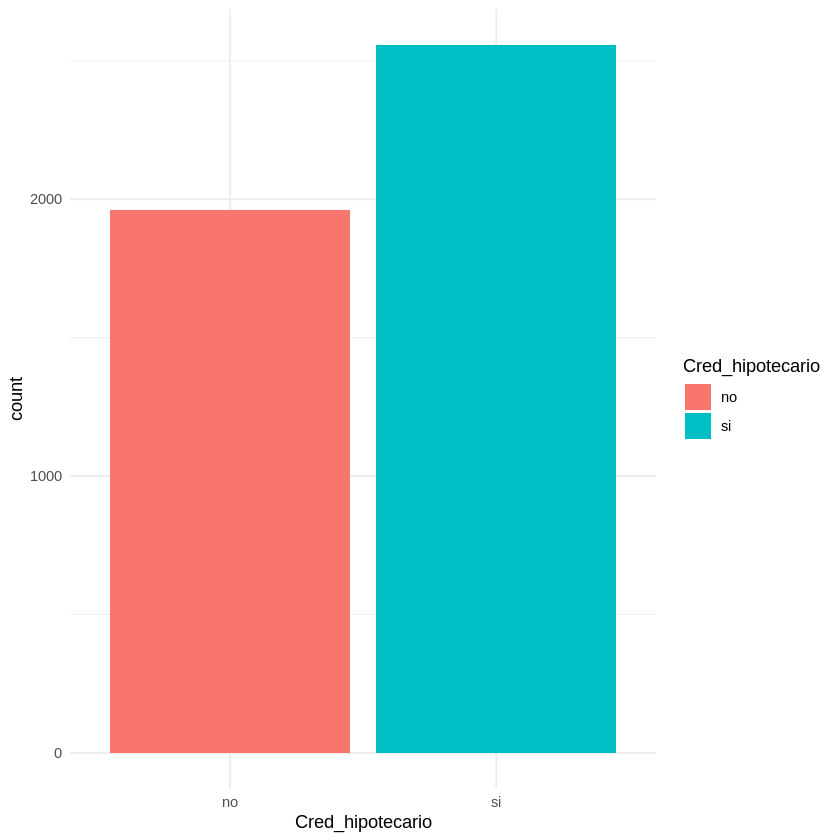

In [53]:
barras_Cred_hipotecario <- ggplot(BaseBanco,aes(x=Cred_hipotecario, fill=Cred_hipotecario))+geom_bar()+theme_minimal()
barras_Cred_hipotecario

####Credito personal

El 84.71% de los clientes en la base no tiene un credito personal vigente con el banco

In [54]:
Tabla_Cred_personal <- table(Cred_personal)
Tabla_Cred_personal

Cred_personal
  no   si 
3830  691 

In [55]:
prop.table(Tabla_Cred_personal)

Cred_personal
       no        si 
0.8471577 0.1528423 

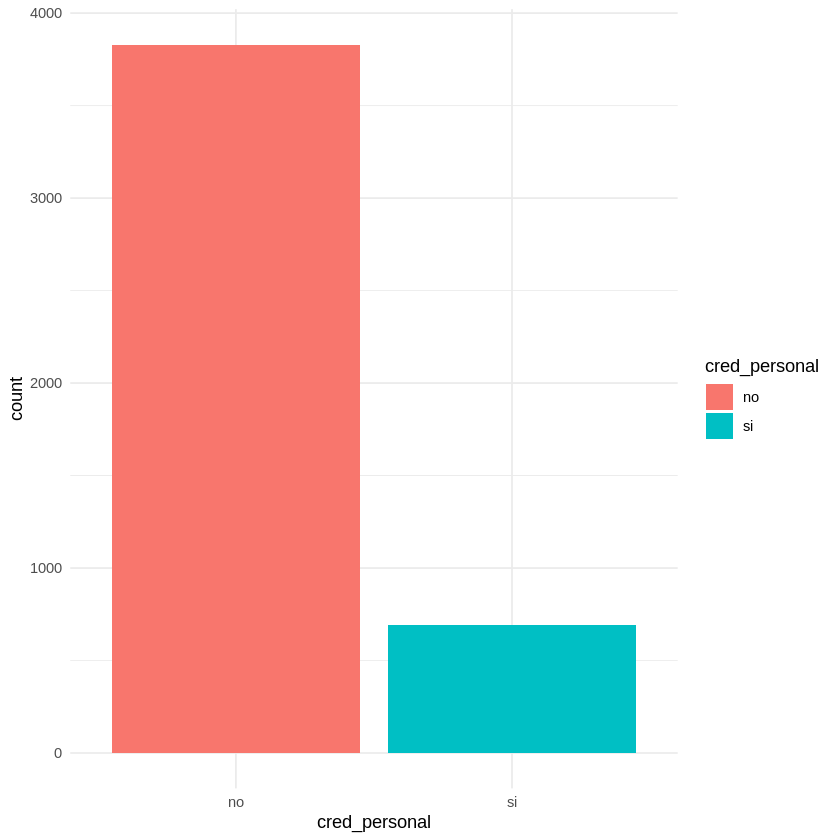

In [56]:
barras_cred_personal <- ggplot(BaseBanco,aes(x=cred_personal, fill=cred_personal))+geom_bar()+theme_minimal()
barras_cred_personal

####Medio de contacto

Se observa que el 64% de los clientes es contactado por celular, en chat es una medida menor de 29.28%, y son muy pocos los clientes en la base contactados por telefono, solo el 6.66%

In [57]:
Tabla_Medio_contacto <- table(Medio_contacto)
Tabla_Medio_contacto

Medio_contacto
 celular     chat telefono 
    2896     1324      301 

In [58]:
prop.table(Tabla_Medio_contacto)

Medio_contacto
   celular       chat   telefono 
0.64056625 0.29285556 0.06657819 

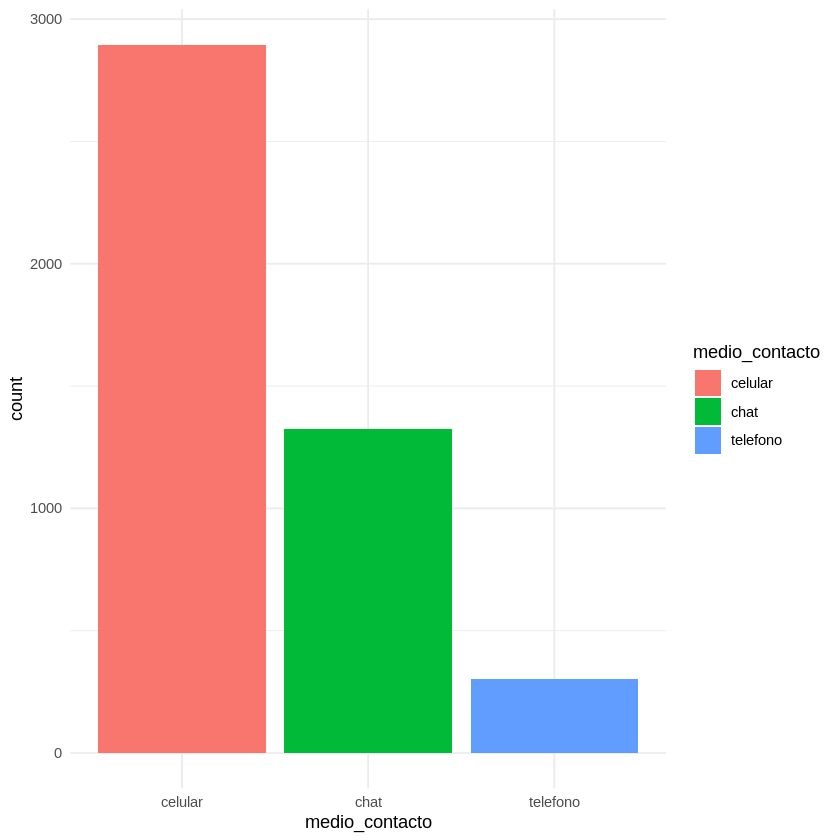

In [59]:
barras_medio_contacto <- ggplot(BaseBanco,aes(x=medio_contacto, fill=medio_contacto))+geom_bar()+theme_minimal()
barras_medio_contacto

###Perfíl objetivo del Banco

Una vez analizada la base, podemos decribir el perfíl general del cliente al que el Banco quiere ofrecerle la tarjeta de crédito:

Es una persona con una edad entre 33 y 49 años pero el perfíl esta más concentrado a personas de 39-40 años , el cual puede tener un contrato laboral de amplio rango entre 18 y 54 meses, en la mayoria de casos no ha sido contactado para campañas de promoción previamente, tiene un trabajo que le asegura dinero, tal como administrador, empresario o informal, actualmente esta casado, tiene un nivel de estudios ya sea de bachillerato o profesional, realmente no tiene mucha importancia si tiene o no un credito hipotecario vigente con el banco, sin embargo si es importante que actualmente no tenga un credito personal con el banco, y por último, preferiblemente se puede contactarlo por su telefono celular

##Analisis perfil de aceptación de la tarjeta

En esta sección vamos a comparar graficos las siguientes variables y hacer su respectivo analisis:
1. Aceptación tarjeta de credito vs Edad
2. Aceptación tarjeta de credito vs Día
3. Aceptación tarjeta de credito vs Contrato meses
4. Aceptación tarjeta de credito vs Duracion segundos
5. Aceptación tarjeta de credito vs Contador camapaña actual
6. Medio de contacto vs contrato meses
7. Medio de contacto vs Dia
8. Nivel educativo vs contrato meses
9. Estado civil vs contrato meses


#### 1. Aceptación tarjeta de credito vs Edad
A continuación se dan los resultados de las medidas de tendencia central y posición para la edad de las personas que *aceptaron* la tarjeta de crédito.  

In [60]:
#Tendencia central y posicion
paste('Media:', mean(edad[aceptacion_TC=="si"]))
paste('Mediana:', median(edad[aceptacion_TC=="si"]))
paste('Moda:', mfv(edad[aceptacion_TC=="si"]))
print('Quantiles:')
quantile(edad[aceptacion_TC=="si"]) 

[1] "Media: 42.4913627639155"

[1] "Mediana: 40"

[1] "Moda: 32"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
  19   32   40   50   87

Como sabemos, la media es suceptible a valores atípicos, por lo que para obtener un resultado más confiable, calculamos la media recortada al 20%. 

In [61]:
paste('Media con media recortada al 20%: ' , mean(edad[aceptacion_TC=="si"], trim = 0.2))

[1] "Media con media recortada al 20%:  40.6645367412141"

Lo que obtenemos es que haciendo una media recortada, el valor se acerca al de la mediana, la cúal es una medida robusta. Además hallamos un dato unimodal. 

A continuación tenemos los datos de dispersión.

In [62]:
#Dispersión:
paste('Rango de la edad', range(edad[aceptacion_TC=="si"]))
paste('Rango intercuartilico de la edad', IQR(edad[aceptacion_TC=="si"]))
paste('Varianza de la edad', var(edad[aceptacion_TC=="si"]))

[1] "Rango de la edad 19" "Rango de la edad 87"

[1] "Rango intercuartilico de la edad 18"

[1] "Varianza de la edad 172.023482946995"

De donde podemos decir, que el 50% que ocupa la parte central de la distribución de la edad de las personas que aceptaron la tarjeta, es mayor a 18 años y menor a 36 años. 

In [63]:
paste('La edad de los clientes que aceptaron la tarjeta estan desviados de la media un: ', sd(edad[aceptacion_TC=="si"]), 'de la muestra')

[1] "La edad de los clientes que aceptaron la tarjeta estan desviados de la media un:  13.1157722970093 de la muestra"

Es decir, en promedio, las edades en este caso se encuentran a 13.116 años de la edad media de la muestra. 

In [64]:
limiteSup<-mean(edad[aceptacion_TC=="si"])+sd(edad[aceptacion_TC=="si"])
limiteInf<-mean(edad[aceptacion_TC=="si"])-sd(edad[aceptacion_TC=="si"])
paste('La edad de los clientes que estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "La edad de los clientes que estan a una desviacion estandar de la media son:"

[1] "X-s:  29.3755904669063"

[1] "X+s:  55.6071350609248"

Los anteriores datos nos ayudan a encontrar el porcentaje de las edades que aceptaron la tarjeta que esta a menos de una desviacion estandar de la muestra y la cantidad de clientes que corresponde a este porcentaje.

In [65]:
total <- sum(edad[aceptacion_TC=="si"]>limiteInf & edad[aceptacion_TC=="si"]<limiteSup)
n <- length(edad[aceptacion_TC=="si"])
porEdadSi <- total/n
numClientesEdadSi<-sum(edad[aceptacion_TC=="si"]>limiteInf & edad[aceptacion_TC=="si"]<limiteSup)
paste('La cantidad de clientes que esta a una desviación estandar son de:',
      numClientesEdadSi , 
      'y corresponde a un porcentaje de:', porEdadSi)

[1] "La cantidad de clientes que esta a una desviación estandar son de: 366 y corresponde a un porcentaje de: 0.702495201535509"

Así, el 70.25% de las edades que aceptaron la tarjeta esta a menos de una desviación de la edad promedio de la muestra. Por otro lado, para poder hacer un análsis correspondiente entre datos en tanto a la variación de la muestra, hallamos su coeficiente de variación. 

In [66]:
cv <- sd(edad[aceptacion_TC=="si"])/mean(edad[aceptacion_TC=="si"])*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  30.8669137534638"


Ahora hallaremos, las medidas de tendencia central y posicion para la edad de las personas que por el contrario, *no aceptaron* la tarjeta de crédito.

In [67]:
#Tendencia central y posicion
paste('Media:', mean(edad[aceptacion_TC=="no"]))
paste('Mediana:', median(edad[aceptacion_TC=="no"]))
paste('Moda:', mfv(edad[aceptacion_TC=="no"]))
print('Quantiles:')
quantile(edad[aceptacion_TC=="no"]) 

[1] "Media: 40.998"

[1] "Mediana: 39"

[1] "Moda: 34"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
  19   33   39   48   86

Como sabemos, la media es suceptible a valores atípicos, por lo que para obtener un resultado más confiable, calculamos la media recortada al 20%. 

In [68]:
paste('Media con media recortada al 20%: ' , mean(edad[aceptacion_TC=="no"], trim = 0.2))

[1] "Media con media recortada al 20%:  39.8916666666667"

Lo que obtenemos es que haciendo una media recortada, el valor se acerca al de la mediana, la cúal es una medida robusta. Además hallamos un dato unimodal. 

A continuación tenemos los datos de dispersión.

In [69]:
#Dispersión:
paste('Rango de la edad', range(edad[aceptacion_TC=="no"]))
paste('Rango intercuartilico de la edad', IQR(edad[aceptacion_TC=="no"]))
paste('Varianza de la edad', var(edad[aceptacion_TC=="no"]))

[1] "Rango de la edad 19" "Rango de la edad 86"

[1] "Rango intercuartilico de la edad 15"

[1] "Varianza de la edad 103.803446861715"

De donde podemos decir, que el 50% que ocupa la parte central de la distribución de la edad de las personas que no aceptaron la tarjeta, es mayor a 15 años y menor a 30 años. 

In [70]:
paste('La edad de los clientes que no aceptaron la tarjeta estan desviados de la media un: ', sd(edad[aceptacion_TC=="no"]), 'de la muestra')

[1] "La edad de los clientes que no aceptaron la tarjeta estan desviados de la media un:  10.1883976591864 de la muestra"

Es decir, en promedio, las edades en este caso se encuentran a 10.19 años de la edad media de la muestra. 

In [71]:
limiteSup<-mean(edad[aceptacion_TC=="no"])+sd(edad[aceptacion_TC=="no"])
limiteInf<-mean(edad[aceptacion_TC=="no"])-sd(edad[aceptacion_TC=="no"])
paste('La edad de los clientes que no aceptaron la tarjeta estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "La edad de los clientes que no aceptaron la tarjeta estan a una desviacion estandar de la media son:"

[1] "X-s:  30.8096023408136"

[1] "X+s:  51.1863976591864"

Los anteriores datos nos ayudan a encontrar el porcentaje de las edades que no aceptaron la tarjeta que esta a menos de una desviacion estandar de la muestra y la cantidad de clientes que corresponde a este porcentaje.

In [72]:
total <- sum(edad[aceptacion_TC=="no"]>limiteInf & edad[aceptacion_TC=="no"]<limiteSup)
n <- length(edad[aceptacion_TC=="no"])
porEdadNo <- total/n
numClientesEdadNo<-sum(edad[aceptacion_TC=="no"]>limiteInf & edad[aceptacion_TC=="no"]<limiteSup)
paste('La cantidad de clientes que esta a una desviación estandar son de:',
      numClientesEdadNo , 
      'y corresponde a un porcentaje de:', porEdadNo)

[1] "La cantidad de clientes que esta a una desviación estandar son de: 2746 y corresponde a un porcentaje de: 0.6865"

Así, el 79.45% de las edades que aceptaron la tarjeta esta a menos de una desviación de la edad promedio de la muestra. Por otro lado, para poder hacer un análsis correspondiente entre datos en tanto a la variación de la muestra, hallamos su coeficiente de variación. 

In [73]:
cv <- sd(edad[aceptacion_TC=="no"])/mean(edad[aceptacion_TC=="no"])*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  24.8509626303391"

Como podemos ver, la edad de los que aceptaron la tarjeta tienen una mayor dispersión con respecto a la media, de los que no aceptaron. 

Según la gráfica comparando si las personas aceptaron o no una tarjeta de credito según las edades se puede concluir que tiene una asimetria positiva en ambos casos, aunque en la de los que aceptan la tarjeta es levemente mayor significando que las personas más jovenes tienen una mayor aceptación de las tarjetas, no obstante a nivel general son muchas más las personas que rechazan que las que aceptan la tarjeta. En personas de edad mayor (vease la cola) se puede ver que son las que menos aceptan la tarjeta del banco.



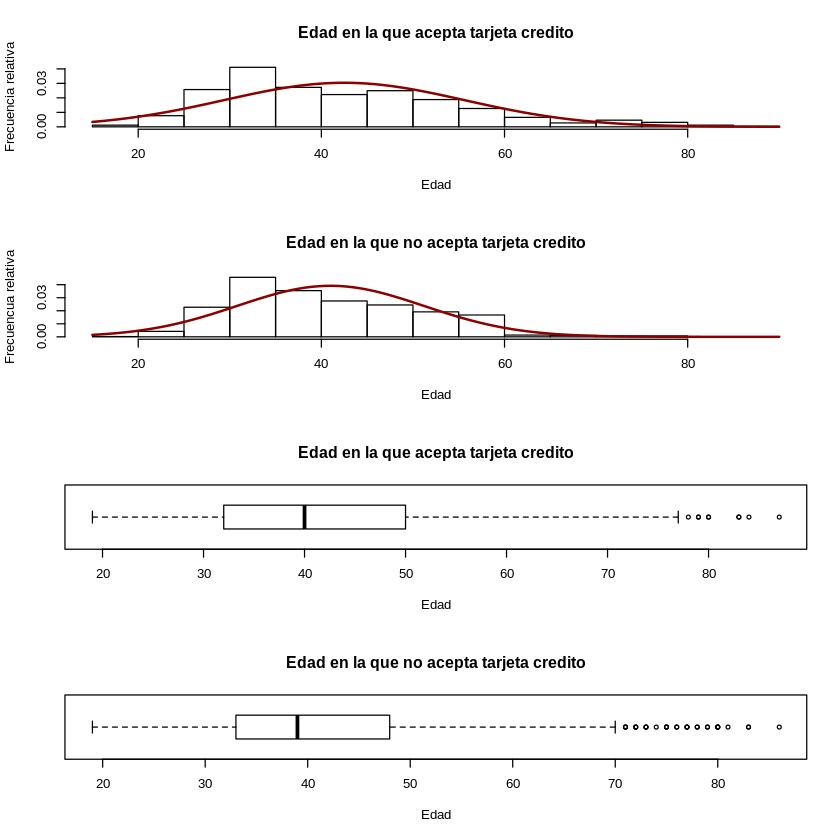

In [74]:
par(mfrow=c(4,1))
hist(edad[aceptacion_TC=="si"], freq = F, main="Edad en la que acepta tarjeta credito", xlab="Edad", ylab="Frecuencia relativa")
curve(dnorm(x,mean=mean(edad[aceptacion_TC=="si"]),sd=sd(edad[aceptacion_TC=="si"])), col="darkred",lwd=2, add=T)
hist(edad[aceptacion_TC=="no"], freq = F, main="Edad en la que no acepta tarjeta credito", xlab="Edad", ylab="Frecuencua relativa")
curve(dnorm(x,mean=mean(edad[aceptacion_TC=="no"]),sd=sd(edad[aceptacion_TC=="no"])), col="darkred",lwd=2, add=T)
diagrama_edad_si <- boxplot(edad[aceptacion_TC=="si"], main = "Edad en la que acepta tarjeta credito", horizontal = TRUE, xlab = "Edad" )
diagrama_edad_no <- boxplot(edad[aceptacion_TC=="no"], main = "Edad en la que no acepta tarjeta credito", horizontal = TRUE, xlab = "Edad" )

In [75]:
paste('Asimetria de la edad de los que aceptaron la tarjeta: ', skew(edad[aceptacion_TC=="si"]))
paste('Curtosis de la edad de los que aceptaron la tarjeta: ', kurtosi(edad[aceptacion_TC=="si"]))
paste('Asimetria de la edad de los no que aceptaron la tarjeta: ', skew(edad[aceptacion_TC=="no"]))
paste('Curtosis de la edad de los no que aceptaron la tarjeta: ', kurtosi(edad[aceptacion_TC=="no"]))

[1] "Asimetria de la edad de los que aceptaron la tarjeta:  0.84268419736255"

[1] "Curtosis de la edad de los que aceptaron la tarjeta:  0.363016533841686"

[1] "Asimetria de la edad de los no que aceptaron la tarjeta:  0.616196423088974"

[1] "Curtosis de la edad de los no que aceptaron la tarjeta:  0.0844949041106573"

In [76]:
print('Valores del Boxplot:') 
diagrama_edad_si$stats
print('Lista de edades atípicas que si aceptaron:')
total_edad_si_out <- sum(diagrama_edad_si$out>73)
diagrama_edad_si$out
paste('Número de datos atípicos:', total_edad_si_out)

[1] "Valores del Boxplot:"


[,1]
[1,]   19
[2,]   32
[3,]   40
[4,]   50
[5,]   77
attr(,"class")
          
"integer"

[1] "Lista de edades atípicas que si aceptaron:"


[1] 78 80 83 79 87 79 80 84 83

[1] "Número de datos atípicos: 9"

Como podemos observar en el caso de los que aceptaron la tarjeta, vemos un comportamiento que tiende a ser levemente leptocurtico, lo que nos dice que existe una mayor concentración de valores en torno a su media. 
En el caso de los que no aceptaron la tarjeta, vemos un comportamiento muy aproximado a ser mesocurtico lo que nos dice que existe una concentración normal de los valores respecto a su media. 

#### 2. Aceptación tarjeta de credito vs Contrato en meses

A continuación se dan los resultados de las medidas de tendencia central y posición para el número de meses del contrato de las personas que aceptaron la tarjeta de crédito.

In [77]:
#Tendencia central y posicion
paste('Media:', mean(contrato_meses[aceptacion_TC=="si"]))
paste('Mediana:', median(contrato_meses[aceptacion_TC=="si"]))
paste('Moda:', mfv(contrato_meses[aceptacion_TC=="si"]))
print('Quantiles:')
quantile(contrato_meses[aceptacion_TC=="si"]) 

[1] "Media: 37.6333973128599"

[1] "Mediana: 38"

[1] "Moda: 38"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   1   19   38   57   72

Como sabemos, la media es suceptible a valores atípicos, por lo que para obtener un resultado más confiable, calculamos la media recortada al 20%. 

In [78]:
paste('Media con media recortada al 20%: ' , mean(contrato_meses[aceptacion_TC=="si"], trim = 0.2))

[1] "Media con media recortada al 20%:  38.1086261980831"

Lo que obtenemos es que haciendo una media recortada, el valor se acerca casi de manera exacta al de la mediana, la cúal es una medida robusta. Además hallamos un dato unimodal. 

A continuación tenemos los datos de dispersión.

In [79]:
#Dispersión:
paste('Rango del contrato en meses', range(contrato_meses[aceptacion_TC=="si"]))
paste('Rango intercuartilico del contrato en meses', IQR(contrato_meses[aceptacion_TC=="si"]))
paste('Varianza del contrato en meses', var(contrato_meses[aceptacion_TC=="si"]))

[1] "Rango del contrato en meses 1"  "Rango del contrato en meses 72"

[1] "Rango intercuartilico del contrato en meses 38"

[1] "Varianza del contrato en meses 462.751882474531"

De donde podemos decir, que el 50% que ocupa la parte central de la distribución del contrato en meses de las personas que aceptaron la tarjeta, es mayor a 38 meses y menor a 72 meses. 

In [80]:
paste('El número de meses del contrato de las personas que aceptaron la tarjeta estan desviados de la media muestral un: ', sd(contrato_meses[aceptacion_TC=="si"]))

[1] "El número de meses del contrato de las personas que aceptaron la tarjeta estan desviados de la media muestral un:  21.5116685190743"

Es decir, en promedio, el número de meses del contrato de los clientes en este caso se encuentran a 21.51 meses del número de meses del contrato media de la muestra. 

In [81]:
limiteSup<-mean(contrato_meses[aceptacion_TC=="si"])+sd(dia[aceptacion_TC=="si"])
limiteInf<-mean(contrato_meses[aceptacion_TC=="si"])-sd(contrato_meses[aceptacion_TC=="si"])
paste('El número de meses del contrato de los clientes que aceptaron la tarjeta estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "El número de meses del contrato de los clientes que aceptaron la tarjeta estan a una desviacion estandar de la media son:"

[1] "X-s:  16.1217287937856"

[1] "X+s:  45.8685455040937"

Los anteriores datos nos ayudan a encontrar el porcentaje del número de meses del contrato que aceptaron la tarjeta que esta a menos de una desviacion estandar de la muestra y la cantidad de clientes que corresponde a este porcentaje.

In [82]:
total <- sum(contrato_meses[aceptacion_TC=="si"]>limiteInf & contrato_meses[aceptacion_TC=="si"]<limiteSup)
n <- length(contrato_meses[aceptacion_TC=="si"])
porcontrato_mesesSi <- total/n
numClientescontrato_mesesSi<-sum(contrato_meses[aceptacion_TC=="si"]>limiteInf & contrato_meses[aceptacion_TC=="si"]<limiteSup)
paste('La cantidad del número de meses del contrato que esta a una desviación estandar son de:',
      numClientescontrato_mesesSi , 
      'y corresponde a un porcentaje de:', porcontrato_mesesSi)

[1] "La cantidad del número de meses del contrato que esta a una desviación estandar son de: 194 y corresponde a un porcentaje de: 0.37236084452975"

Así, el 37.24% del número de meses del contrato de los clientes que aceptaron la tarjeta esta a menos de una desviación del número de meses del contrato promedio de la muestra. Por otro lado, para poder hacer un análsis correspondiente entre datos en tanto a la variación de la muestra, hallamos su coeficiente de variación. 

In [83]:
cv <- sd(contrato_meses[aceptacion_TC=="si"])/mean(contrato_meses[aceptacion_TC=="si"])*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  57.1611123498633"


Ahora hallaremos, las medidas de tendencia central y posicion para el número de contrato en meses de las personas que por el contrario, *no aceptaron* la tarjeta de crédito.

In [84]:
#Tendencia central y posicion
paste('Media:', mean(contrato_meses[aceptacion_TC=="no"]))
paste('Mediana:', median(contrato_meses[aceptacion_TC=="no"]))
paste('Moda:', mfv(contrato_meses[aceptacion_TC=="no"]))
print('Quantiles:')
quantile(contrato_meses[aceptacion_TC=="no"]) 

[1] "Media: 36.09475"

[1] "Mediana: 36"

[1] "Moda: 54"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   1   18   36   54   72

Lo que obtenemos es que el valor de la media se acerca al de la mediana, la cúal es una medida robusta. Además hallamos un dato unimodal. Por otra parte, tenemos una moda mucho mayor ...

A continuación tenemos los datos de dispersión.

In [85]:
#Dispersión:
paste('Rango del número de meses del contrato', range(contrato_meses[aceptacion_TC=="no"]))
paste('Rango intercuartilico del número de meses del contrato', IQR(contrato_meses[aceptacion_TC=="no"]))
paste('Varianza del número de meses del contrato', var(contrato_meses[aceptacion_TC=="no"]))

[1] "Rango del número de meses del contrato 1" 
[2] "Rango del número de meses del contrato 72"

[1] "Rango intercuartilico del número de meses del contrato 36"

[1] "Varianza del número de meses del contrato 425.29809696174"

De donde podemos decir, que el 50% que ocupa la parte central de la distribución del número en contrato en meses de las personas que no aceptaron la tarjeta, es mayor a 36 meses y menor a 72 meses. Lo que comparando con el rango intercuartilico de las personas que si aceptaron la tarjeta, nos hace concluir que las personas que no aceptaron la tarjeta tienen un menor número de meses de su contrato. 

In [86]:
paste('El número de meses del contrato de los clientes que no aceptaron la tarjeta estan desviados de la media un: ', sd(contrato_meses[aceptacion_TC=="no"]), 'de la muestra')

[1] "El número de meses del contrato de los clientes que no aceptaron la tarjeta estan desviados de la media un:  20.6227567740528 de la muestra"

Es decir, en promedio, las edades en este caso se encuentran a 10.19 años de la edad media de la muestra. 

In [87]:
limiteSup<-mean(contrato_meses[aceptacion_TC=="no"])+sd(contrato_meses[aceptacion_TC=="no"])
limiteInf<-mean(contrato_meses[aceptacion_TC=="no"])-sd(contrato_meses[aceptacion_TC=="no"])
paste('El número de meses del contrato de los clientes que no aceptaron la tarjeta estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "El número de meses del contrato de los clientes que no aceptaron la tarjeta estan a una desviacion estandar de la media son:"

[1] "X-s:  15.4719932259472"

[1] "X+s:  56.7175067740528"

Los anteriores datos nos ayudan a encontrar el porcentaje del número de meses del contrato de las personas que no aceptaron la tarjeta que esta a menos de una desviacion estandar de la muestra y la cantidad de clientes que corresponde a este porcentaje.

In [88]:
total <- sum(contrato_meses[aceptacion_TC=="no"]>limiteInf & contrato_meses[aceptacion_TC=="no"]<limiteSup)
n <- length(contrato_meses[aceptacion_TC=="no"])
porcontrato_mesesNo <- total/n
numClientescontrato_mesesNo<-sum(contrato_meses[aceptacion_TC=="no"]>limiteInf & contrato_meses[aceptacion_TC=="no"]<limiteSup)
paste('La cantidad de clientes que esta a una desviación estandar son de:',
      numClientescontrato_mesesNo , 
      'y corresponde a un porcentaje de:', porcontrato_mesesNo)

[1] "La cantidad de clientes que esta a una desviación estandar son de: 2316 y corresponde a un porcentaje de: 0.579"

Así, el 57.9% de las edades que aceptaron la tarjeta esta a menos de una desviación de la edad promedio de la muestra. Por otro lado, para poder hacer un análsis correspondiente entre datos en tanto a la variación de la muestra, hallamos su coeficiente de variación. 

In [89]:
cv <- sd(contrato_meses[aceptacion_TC=="no"])/mean(contrato_meses[aceptacion_TC=="no"])*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  57.1350591818832"

Como podemos ver, el número de meses del contrato de las personas que aceptaron y no la tarjeta del banco, tiene una dispersión similar y es bastante amplia, comparando con las demás variables trabajadas. 

Según la gráfica comparando si las personas aceptaron o no una tarjeta de credito según el número de meses del contrato se puede concluir que los que aceptaron tienen una asimetria positiva, en cambio los que no aceptaron tienen una asimetria negativa, sin emabargo, graficamente es dificil de observar, ya que la asimetria no es muy pronunciada, lo que significa que no hay una relación directa preferente para la aceptación de la tarjeta según el número de meses.  

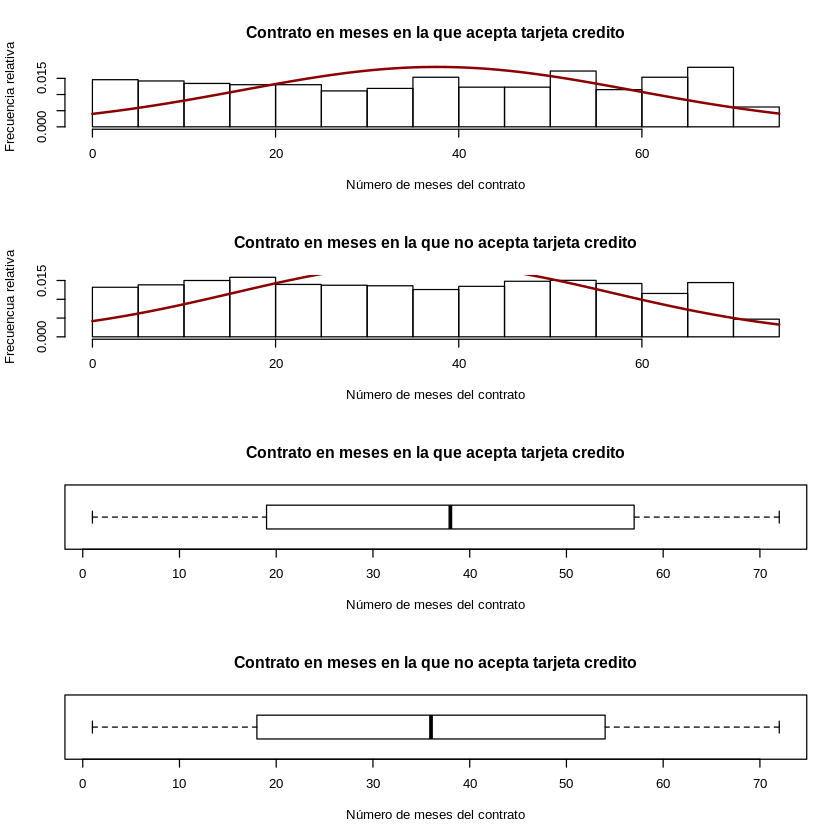

In [90]:
par(mfrow=c(4,1))
hist(contrato_meses[aceptacion_TC=="si"], freq = F, main="Contrato en meses en la que acepta tarjeta credito", xlab="Número de meses del contrato", ylab="Frecuencia relativa")
curve(dnorm(x,mean=mean(contrato_meses[aceptacion_TC=="si"]),sd=sd(contrato_meses[aceptacion_TC=="si"])), col="darkred",lwd=2, add=T)
hist(contrato_meses[aceptacion_TC=="no"], freq = F, main="Contrato en meses en la que no acepta tarjeta credito", xlab="Número de meses del contrato", ylab="Frecuencua relativa")
curve(dnorm(x,mean=mean(contrato_meses[aceptacion_TC=="no"]),sd=sd(contrato_meses[aceptacion_TC=="no"])), col="darkred",lwd=2, add=T)
diagrama_contrato_meses_si <- boxplot(contrato_meses[aceptacion_TC=="si"], main = "Contrato en meses en la que acepta tarjeta credito", horizontal = TRUE, xlab = "Número de meses del contrato" )
diagrama_contrato_meses_no <- boxplot(contrato_meses[aceptacion_TC=="no"], main = "Contrato en meses en la que no acepta tarjeta credito", horizontal = TRUE, xlab = "Número de meses del contrato" )

In [91]:
paste('Asimetria del contrato en meses de los que aceptaron la tarjeta: ', skew(contrato_meses[aceptacion_TC=="si"]))
paste('Curtosis del contrato en meses de los que aceptaron la tarjeta: ', kurtosi(contrato_meses[aceptacion_TC=="si"]))
paste('Asimetria del contrato en meses de los no que aceptaron la tarjeta: ', skew(contrato_meses[aceptacion_TC=="no"]))
paste('Curtosis del contrato en meses de los no que aceptaron la tarjeta: ', kurtosi(contrato_meses[aceptacion_TC=="no"]))

[1] "Asimetria del contrato en meses de los que aceptaron la tarjeta:  -0.0820668120745959"

[1] "Curtosis del contrato en meses de los que aceptaron la tarjeta:  -1.27592714175404"

[1] "Asimetria del contrato en meses de los no que aceptaron la tarjeta:  0.0238275505462149"

[1] "Curtosis del contrato en meses de los no que aceptaron la tarjeta:  -1.20668689238878"

Como podemos observar tanto en el caso de los que no aceptaron, como en el de los que aceptaron tenemos un comportamiento platicurtico lo que nos dice que existe una baja concentración de valores respecto a su media. 

#### 3. Aceptación tarjeta de credito vs Duración segundos
A continuación se dan los resultados de las medidas de tendencia central y posición para la duración en segundos de la llamada de las personas que aceptaron la tarjeta de crédito.

In [92]:
#Tendencia central y posicion
paste('Media:', mean(duracion_seg[aceptacion_TC=="si"]))
paste('Mediana:', median(duracion_seg[aceptacion_TC=="si"]))
paste('Moda:', mfv(duracion_seg[aceptacion_TC=="si"]))
print('Quantiles:')
quantile(duracion_seg[aceptacion_TC=="si"]) 

[1] "Media: 552.742802303263"

[1] "Mediana: 442"

[1] "Moda: 185"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
  30  260  442  755 2769

Como sabemos, la media es suceptible a valores atípicos, por lo que para obtener un resultado más confiable, calculamos la media recortada al 20%. 

In [93]:
paste('Media con media recortada al 20%: ' , mean(duracion_seg[aceptacion_TC=="si"], trim = 0.2))

[1] "Media con media recortada al 20%:  476.769968051118"

Lo que obtenemos es que haciendo una media recortada, el valor se acerca al de la mediana, la cúal es una medida robusta y cambia bastante comparandolo con el valor de la media normal. Además hallamos un dato unimodal. 

A continuación tenemos los datos de dispersión.

In [94]:
#Dispersión:
paste('Rango de la duración en segundos de la llamada', range(duracion_seg[aceptacion_TC=="si"]))
paste('Rango intercuartilico de la duración en segundos de la llamada', IQR(duracion_seg[aceptacion_TC=="si"]))
paste('Varianza de la duración en segundos de la llamada', var(duracion_seg[aceptacion_TC=="si"]))

[1] "Rango de la duración en segundos de la llamada 30"  
[2] "Rango de la duración en segundos de la llamada 2769"

[1] "Rango intercuartilico de la duración en segundos de la llamada 495"

[1] "Varianza de la duración en segundos de la llamada 152354.233722132"

De donde podemos decir, que el 50% que ocupa la parte central de la distribución de la duración en segundos de la llamada de las personas que aceptaron la tarjeta, es mayor a 495 segundos y menor a 990 segundos. 

In [95]:
paste('La duración en segundos de la llamada de las personas que aceptaron la tarjeta estan desviados de la media un: ', sd(duracion_seg[aceptacion_TC=="si"]), 'de la muestra')

[1] "La duración en segundos de la llamada de las personas que aceptaron la tarjeta estan desviados de la media un:  390.325804581419 de la muestra"

Es decir, en promedio, la duración en segundos de la llamada de los clientes en este caso se encuentran a 390.33 de la duración en segundos de la llamada media de la muestra. 

In [96]:
limiteSup<-mean(duracion_seg[aceptacion_TC=="si"])+sd(dia[aceptacion_TC=="si"])
limiteInf<-mean(duracion_seg[aceptacion_TC=="si"])-sd(duracion_seg[aceptacion_TC=="si"])
paste('La duración en segundos de la llamada de los clientes que aceptaron la tarjeta estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "La duración en segundos de la llamada de los clientes que aceptaron la tarjeta estan a una desviacion estandar de la media son:"

[1] "X-s:  162.416997721844"

[1] "X+s:  560.977950494497"

Los anteriores datos nos ayudan a encontrar el porcentaje de la duración en segundos de la llamada de las personas que aceptaron la tarjeta que esta a menos de una desviacion estandar de la muestra y la cantidad de clientes que corresponde a este porcentaje.

In [97]:
total <- sum(duracion_seg[aceptacion_TC=="si"]>limiteInf & duracion_seg[aceptacion_TC=="si"]<limiteSup)
n <- length(duracion_seg[aceptacion_TC=="si"])
porduracion_segSi <- total/n
numClientesduracion_segSi<-sum(duracion_seg[aceptacion_TC=="si"]>limiteInf & duracion_seg[aceptacion_TC=="si"]<limiteSup)
paste('La duración en segundos de la llamada que esta a una desviación estandar son de:',
      numClientesduracion_segSi , 
      'y corresponde a un porcentaje de:', porduracion_segSi)

[1] "La duración en segundos de la llamada que esta a una desviación estandar son de: 266 y corresponde a un porcentaje de: 0.510556621880998"

Así, el 51.06% del número de meses del contrato de los clientes que aceptaron la tarjeta esta a menos de una desviación de la duración en segundos de la llamada promedio de la muestra. Por otro lado, para poder hacer un análsis correspondiente entre datos en tanto a la variación de la muestra, hallamos su coeficiente de variación. 

In [98]:
cv <- sd(duracion_seg[aceptacion_TC=="si"])/mean(duracion_seg[aceptacion_TC=="si"])*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  70.6161713829547"


Ahora hallaremos, las medidas de tendencia central y posicion para el número de contrato en meses de las personas que por el contrario, *no aceptaron* la tarjeta de crédito.

In [99]:
#Tendencia central y posicion
paste('Media:', mean(duracion_seg[aceptacion_TC=="no"]))
paste('Mediana:', median(duracion_seg[aceptacion_TC=="no"]))
paste('Moda:', mfv(duracion_seg[aceptacion_TC=="no"]))
print('Quantiles:')
quantile(duracion_seg[aceptacion_TC=="no"]) 

[1] "Media: 226.3475"

[1] "Mediana: 167"

[1] "Moda: 123"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   4   96  167  283 3025

Como sabemos, la media es suceptible a valores atípicos, por lo que para obtener un resultado más confiable, calculamos la media recortada al 20%. 

In [100]:
paste('Media con media recortada al 20%: ' , mean(duracion_seg[aceptacion_TC=="no"], trim = 0.2))

[1] "Media con media recortada al 20%:  177.625"

Lo que obtenemos es que haciendo una media recortada, el valor se acerca al de la mediana, la cúal es una medida robusta y varia bastante al de la media normal. Hallamos un dato unimodal. Además podemos ver que la duración en segundos de la llamada de las personas que no acpetaron la tarjeta es mucho menor que a la duración de los que si aceptaron. 

A continuación tenemos los datos de dispersión.

In [101]:
#Dispersión:
paste('Rango de la duración en segundos de la llamada', range(duracion_seg[aceptacion_TC=="no"]))
paste('Rango intercuartilico de la duración en segundos de la llamada', IQR(duracion_seg[aceptacion_TC=="no"]))
paste('Varianza de la duración en segundos de la llamada', var(duracion_seg[aceptacion_TC=="no"]))

[1] "Rango de la duración en segundos de la llamada 4"   
[2] "Rango de la duración en segundos de la llamada 3025"

[1] "Rango intercuartilico de la duración en segundos de la llamada 187"

[1] "Varianza de la duración en segundos de la llamada 44231.8231995499"

De donde podemos decir, que el 50% que ocupa la parte central de la distribución de la duración en segundos de la llamada de las personas que no aceptaron la tarjeta, es mayor a 187 segundos y menor a 374 segundos. Lo que comparando con el rango intercuartilico de las personas que si aceptaron la tarjeta, nos hace concluir que las personas que no aceptaron la tarjeta tienen una menor número de la llamada notablemente. 

In [102]:
paste('La duración en segundos de la llamada que no aceptaron la tarjeta estan desviados de la media un: ', sd(duracion_seg[aceptacion_TC=="no"]), 'de la muestra')

[1] "La duración en segundos de la llamada que no aceptaron la tarjeta estan desviados de la media un:  210.313630560527 de la muestra"

Es decir, en promedio, la duración en segundos de la llamada en este caso se encuentran a 210.31 segundos de la duración en segundos de la llamada media de la muestra. 

In [103]:
limiteSup<-mean(duracion_seg[aceptacion_TC=="no"])+sd(duracion_seg[aceptacion_TC=="no"])
limiteInf<-mean(duracion_seg[aceptacion_TC=="no"])-sd(duracion_seg[aceptacion_TC=="no"])
paste('La duración en segundos de la llamada de los clientes que no aceptaron la tarjeta estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "La duración en segundos de la llamada de los clientes que no aceptaron la tarjeta estan a una desviacion estandar de la media son:"

[1] "X-s:  16.0338694394729"

[1] "X+s:  436.661130560527"

Los anteriores datos nos ayudan a encontrar el porcentaje de la duración en segundos de la llamada de las personas que no aceptaron la tarjeta que esta a menos de una desviacion estandar de la muestra y la cantidad de clientes que corresponde a este porcentaje.

In [104]:
total <- sum(duracion_seg[aceptacion_TC=="no"]>limiteInf & duracion_seg[aceptacion_TC=="no"]<limiteSup)
n <- length(duracion_seg[aceptacion_TC=="no"])
porduracion_segNo <- total/n
numClientesduracion_segNo<-sum(duracion_seg[aceptacion_TC=="no"]>limiteInf & duracion_seg[aceptacion_TC=="no"]<limiteSup)
paste('La cantidad de clientes que esta a una desviación estandar son de:',
      numClientesduracion_segNo , 
      'y corresponde a un porcentaje de:', porduracion_segNo)

[1] "La cantidad de clientes que esta a una desviación estandar son de: 3444 y corresponde a un porcentaje de: 0.861"

Así, el 86.1% de la duración en segundos de la llamada de las personas que aceptaron la tarjeta esta a menos de una desviación de la edad promedio de la muestra. Por otro lado, para poder hacer un análsis correspondiente entre datos en tanto a la variación de la muestra, hallamos su coeficiente de variación. 

In [105]:
cv <- sd(duracion_seg[aceptacion_TC=="no"])/mean(duracion_seg[aceptacion_TC=="no"])*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  92.9162595392161"

Como podemos ver, la duración en segundos de la llamada de las personas que aceptaron y no la tarjeta del banco, tiene una dispersión similar y es demasiado amplia, comparando con las demás variables trabajadas. Cabe aclarar que aunque tienen un coeficiente de variación similar, tiene menor dispersión la duración de los que aceptaron la tarjeta. 

Según la gráfica comparando si las personas aceptaron o no una tarjeta de credito según la duración en segundos de la llamada se puede concluir que los que aceptaron y no aceptaron tienen una asimetria positiva bastante marcada, aunque en el caso de los que no aceptaron es mayor. De igual manera, por la asimetria, podemos decir que, el caso de llamadas con duraciones largas es mucho menos frecuente y que la duracion de llamadas muy cortas se da sobre todo en los que no aceptaron. 
 

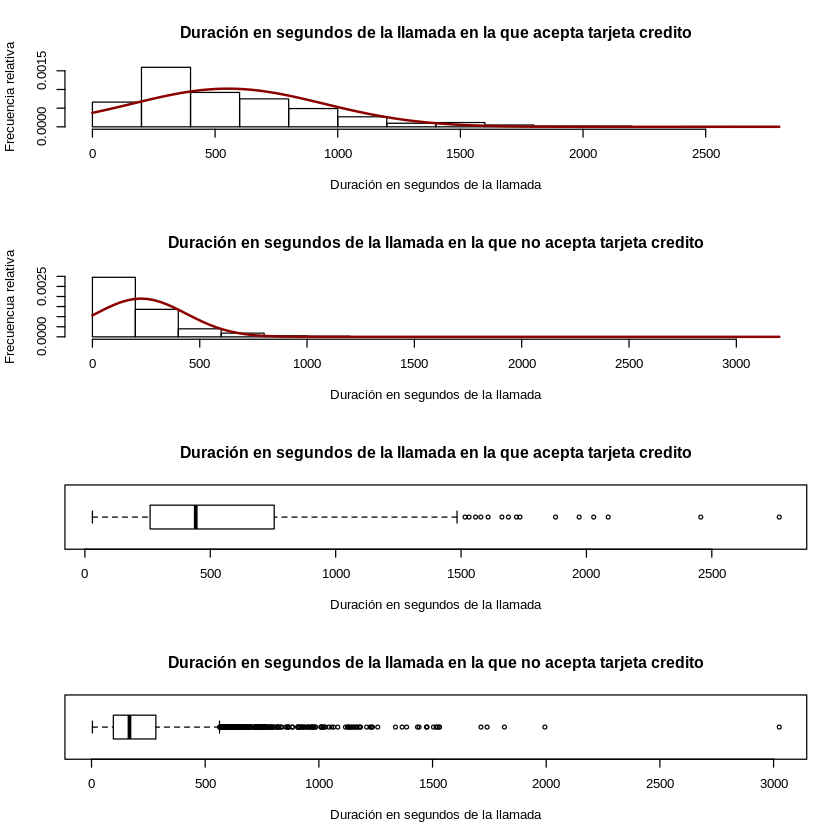

In [106]:
par(mfrow=c(4,1))
hist(duracion_seg[aceptacion_TC=="si"], freq = F, main="Duración en segundos de la llamada en la que acepta tarjeta credito", xlab="Duración en segundos de la llamada", ylab="Frecuencia relativa")
curve(dnorm(x,mean=mean(duracion_seg[aceptacion_TC=="si"]),sd=sd(duracion_seg[aceptacion_TC=="si"])), col="darkred",lwd=2, add=T)
hist(duracion_seg[aceptacion_TC=="no"], freq = F, main="Duración en segundos de la llamada en la que no acepta tarjeta credito", xlab="Duración en segundos de la llamada", ylab="Frecuencua relativa")
curve(dnorm(x,mean=mean(duracion_seg[aceptacion_TC=="no"]),sd=sd(duracion_seg[aceptacion_TC=="no"])), col="darkred",lwd=2, add=T)
diagrama_duracion_seg_si <- boxplot(duracion_seg[aceptacion_TC=="si"], main = "Duración en segundos de la llamada en la que acepta tarjeta credito", horizontal = TRUE, xlab = "Duración en segundos de la llamada" )
diagrama_duracion_seg_no <- boxplot(duracion_seg[aceptacion_TC=="no"], main = "Duración en segundos de la llamada en la que no acepta tarjeta credito", horizontal = TRUE, xlab = "Duración en segundos de la llamada" )

In [107]:
paste('Asimetria de la duracion en segundos de los que aceptaron la tarjeta: ', skew(duracion_seg[aceptacion_TC=="si"]))
paste('Curtosis de la duracion en segundos de los que aceptaron la tarjeta: ', kurtosi(duracion_seg[aceptacion_TC=="si"]))
paste('Asimetria de la duracion en segundos de los no que aceptaron la tarjeta: ', skew(duracion_seg[aceptacion_TC=="no"]))
paste('Curtosis de la duracion en segundos de los no que aceptaron la tarjeta: ', kurtosi(duracion_seg[aceptacion_TC=="no"]))

[1] "Asimetria de la duracion en segundos de los que aceptaron la tarjeta:  1.58139280234937"

[1] "Curtosis de la duracion en segundos de los que aceptaron la tarjeta:  3.71485833669223"

[1] "Asimetria de la duracion en segundos de los no que aceptaron la tarjeta:  2.95035813167449"

[1] "Curtosis de la duracion en segundos de los no que aceptaron la tarjeta:  16.6310853733125"

Como podemos observar tanto en el caso de los que no aceptaron, como en el de los que aceptaron tenemos un comportamiento leptocurtico lo que nos dice que existe una muy alta concentración de valores respecto a su media, sobre todo en el caso de los que no aceptaron. 

#### 4. Aceptación tarjeta de credito vs número de veces que se contacto al cliente en la campaña actual. 
A continuación se dan los resultados de las medidas de tendencia central y posición para número de veces que se contacto al cliente en la campaña actual que aceptaron la tarjeta de crédito.

In [108]:
#Tendencia central y posicion
paste('Media:', mean(cont_campana_actual[aceptacion_TC=="si"]))
paste('Mediana:', median(cont_campana_actual[aceptacion_TC=="si"]))
paste('Moda:', mfv(cont_campana_actual[aceptacion_TC=="si"]))
print('Quantiles:')
quantile(cont_campana_actual[aceptacion_TC=="si"]) 

[1] "Media: 2.26679462571977"

[1] "Mediana: 2"

[1] "Moda: 1"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   1    1    2    3   24

Como sabemos, la media es suceptible a valores atípicos, por lo que para obtener un resultado más confiable, calculamos la media recortada al 10%. 

In [109]:
paste('Media con media recortada al 10%: ' , mean(cont_campana_actual[aceptacion_TC=="si"], trim = 0.1))

[1] "Media con media recortada al 10%:  1.84892086330935"

Lo que obtenemos es que haciendo una media recortada, el valor se acerca al de la mediana, la cúal es una medida robusta. Además en este caso, como no podemos contactar por ejemplo 1.84 veces se aproxima a la media normal que es 2. Hallamos un dato unimodal. 

A continuación tenemos los datos de dispersión.

In [110]:
#Dispersión:
paste('Rango del número de veces que se contacto al cliente en la campaña actual', range(cont_campana_actual[aceptacion_TC=="si"]))
paste('Rango intercuartilico del número de veces que se contacto al cliente en la campaña actual', IQR(cont_campana_actual[aceptacion_TC=="si"]))
paste('Varianza del número de veces que se contacto al cliente en la campaña actual', var(cont_campana_actual[aceptacion_TC=="si"]))

[1] "Rango del número de veces que se contacto al cliente en la campaña actual 1" 
[2] "Rango del número de veces que se contacto al cliente en la campaña actual 24"

[1] "Rango intercuartilico del número de veces que se contacto al cliente en la campaña actual 2"

[1] "Varianza del número de veces que se contacto al cliente en la campaña actual 4.37676066735568"

De donde podemos decir, que el 50% que ocupa la parte central de la distribución del número de veces que se contacto al cliente en la campaña actual  de las personas que aceptaron la tarjeta, es mayor a 2 veces y menor a 4 veces, muy alejado del extremo mayor que son 24 veces. 

In [111]:
paste('El número de veces que se contacto al cliente en la campaña actual de las personas que aceptaron la tarjeta estan desviados de la media un: ', sd(cont_campana_actual[aceptacion_TC=="si"]), 'de la muestra')

[1] "El número de veces que se contacto al cliente en la campaña actual de las personas que aceptaron la tarjeta estan desviados de la media un:  2.09207090399816 de la muestra"

Es decir, en promedio, el número de veces que se contacto al cliente en la campaña actual en este caso se encuentran a 2.09 veces del número de veces que se contacto al cliente en la campaña actual media de la muestra. 

In [112]:
limiteSup<-mean(cont_campana_actual[aceptacion_TC=="si"])+sd(dia[aceptacion_TC=="si"])
limiteInf<-mean(cont_campana_actual[aceptacion_TC=="si"])-sd(cont_campana_actual[aceptacion_TC=="si"])
paste('El número de veces que se contacto al cliente en la campaña actual que aceptaron la tarjeta estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "El número de veces que se contacto al cliente en la campaña actual que aceptaron la tarjeta estan a una desviacion estandar de la media son:"

[1] "X-s:  0.17472372172161"

[1] "X+s:  10.5019428169536"

Los anteriores datos nos ayudan a encontrar el porcentaje del número de veces que se contacto al cliente en la campaña actual que aceptaron la tarjeta que esta a menos de una desviacion estandar de la muestra y la cantidad de clientes que corresponde a este porcentaje.

In [113]:
total <- sum(cont_campana_actual[aceptacion_TC=="si"]>limiteInf & cont_campana_actual[aceptacion_TC=="si"]<limiteSup)
n <- length(cont_campana_actual[aceptacion_TC=="si"])
porcont_campana_actualSi <- total/n
numClientescont_campana_actualSi<-sum(cont_campana_actual[aceptacion_TC=="si"]>limiteInf & cont_campana_actual[aceptacion_TC=="si"]<limiteSup)
paste('La cantidad del número de veces que se contacto al cliente en la campaña actual que esta a una desviación estandar son de:',
      numClientescont_campana_actualSi , 
      'y corresponde a un porcentaje de:', porcont_campana_actualSi)

[1] "La cantidad del número de veces que se contacto al cliente en la campaña actual que esta a una desviación estandar son de: 516 y corresponde a un porcentaje de: 0.990403071017274"

Así, el 99.04% del número de meses del contrato de los clientes que aceptaron la tarjeta esta a menos de una desviación del número de meses del contrato promedio de la muestra. Por otro lado, para poder hacer un análsis correspondiente entre datos en tanto a la variación de la muestra, hallamos su coeficiente de variación. 

In [114]:
cv <- sd(cont_campana_actual[aceptacion_TC=="si"])/mean(cont_campana_actual[aceptacion_TC=="si"])*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  92.2920356463202"


Ahora hallaremos, las medidas de tendencia central y posicion para el número de veces que se contacto al cliente en la campaña actual de las personas que por el contrario, *no aceptaron* la tarjeta de crédito.

In [115]:
#Tendencia central y posicion
paste('Media:', mean(cont_campana_actual[aceptacion_TC=="no"]))
paste('Mediana:', median(cont_campana_actual[aceptacion_TC=="no"]))
paste('Moda:', mfv(cont_campana_actual[aceptacion_TC=="no"]))
print('Quantiles:')
quantile(cont_campana_actual[aceptacion_TC=="no"]) 

[1] "Media: 2.86225"

[1] "Mediana: 2"

[1] "Moda: 1"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   1    1    2    3   50

Como sabemos, la media es suceptible a valores atípicos, por lo que para obtener un resultado más confiable, calculamos la media recortada al 20%. 

In [116]:
paste('Media con media recortada al 20%: ' , mean(cont_campana_actual[aceptacion_TC=="no"], trim = 0.2))

[1] "Media con media recortada al 20%:  1.98541666666667"

Lo que obtenemos es que haciendo una media recortada, el valor se acerca al de la mediana, la cúal es una medida robusta y es menor al de la media normal. Además hallamos un dato unimodal. Comparando con los que aceptaron, tenemos una misma moda.

A continuación tenemos los datos de dispersión.

In [117]:
#Dispersión:
paste('Rango del número de veces que se contacto al cliente en la campaña actual', range(cont_campana_actual[aceptacion_TC=="no"]))
paste('Rango intercuartilico del número de veces que se contacto al cliente en la campaña actual', IQR(cont_campana_actual[aceptacion_TC=="no"]))
paste('Varianza del número de veces que se contacto al cliente en la campaña actual', var(cont_campana_actual[aceptacion_TC=="no"]))

[1] "Rango del número de veces que se contacto al cliente en la campaña actual 1" 
[2] "Rango del número de veces que se contacto al cliente en la campaña actual 50"

[1] "Rango intercuartilico del número de veces que se contacto al cliente en la campaña actual 2"

[1] "Varianza del número de veces que se contacto al cliente en la campaña actual 10.3208551512878"

De donde podemos decir, que el 50% que ocupa la parte central de la distribución del número de veces que se contacto al cliente en la campaña actual de las personas que no aceptaron la tarjeta, es mayor a 2 veces y menor a 4 veces. Lo que comparando con el rango intercuartilico de las personas que si aceptaron la tarjeta, tenemos un mismo rango intercuartilico, aunque cabe resaltar que en este caso, que no aceptaron el valor extremo es aún mayor que de los que aceptaron. 

In [118]:
paste('El número de veces que se contacto al cliente en la campaña actual de los clientes que no aceptaron la tarjeta estan desviados de la media un: ', sd(cont_campana_actual[aceptacion_TC=="no"]), 'de la muestra')

[1] "El número de veces que se contacto al cliente en la campaña actual de los clientes que no aceptaron la tarjeta estan desviados de la media un:  3.21260877656895 de la muestra"

Es decir, en promedio, el número de veces que se contacto al cliente en la campaña actual en este caso se encuentran a 3.21 desviaciones del número de veces que se contacto al cliente en la campaña actual media de la muestra. 

In [119]:
limiteSup<-mean(cont_campana_actual[aceptacion_TC=="no"])+sd(cont_campana_actual[aceptacion_TC=="no"])
limiteInf<-mean(cont_campana_actual[aceptacion_TC=="no"])-sd(cont_campana_actual[aceptacion_TC=="no"])
paste('El número de veces que se contacto al cliente en la campaña actual de los clientes que no aceptaron la tarjeta estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "El número de veces que se contacto al cliente en la campaña actual de los clientes que no aceptaron la tarjeta estan a una desviacion estandar de la media son:"

[1] "X-s:  -0.350358776568946"

[1] "X+s:  6.07485877656895"

Los anteriores datos nos ayudan a encontrar el porcentaje delnúmero de veces que se contacto al cliente en la campaña actual de las personas que no aceptaron la tarjeta que esta a menos de una desviacion estandar de la muestra y la cantidad de clientes que corresponde a este porcentaje.

In [120]:
total <- sum(cont_campana_actual[aceptacion_TC=="no"]>limiteInf & cont_campana_actual[aceptacion_TC=="no"]<limiteSup)
n <- length(cont_campana_actual[aceptacion_TC=="no"])
porcont_campana_actualNo <- total/n
numClientescont_campana_actualNo<-sum(cont_campana_actual[aceptacion_TC=="no"]>limiteInf & cont_campana_actual[aceptacion_TC=="no"]<limiteSup)
paste('La cantidad de clientes que esta a una desviación estandar son de:',
      numClientescont_campana_actualNo , 
      'y corresponde a un porcentaje de:', porcont_campana_actualNo)

[1] "La cantidad de clientes que esta a una desviación estandar son de: 3700 y corresponde a un porcentaje de: 0.925"

Así, el 92.5% de las edades que aceptaron la tarjeta esta a menos de una desviación del número de veces que se contacto al cliente en la campaña actual promedio de la muestra. Por otro lado, para poder hacer un análsis correspondiente entre datos en tanto a la variación de la muestra, hallamos su coeficiente de variación. 

In [121]:
cv <- sd(cont_campana_actual[aceptacion_TC=="no"])/mean(cont_campana_actual[aceptacion_TC=="no"])*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  112.24067696983"

Como podemos ver, el número de meses del contrato de las personas que aceptaron y no la tarjeta del banco, tiene una dispersión similar y es bastante amplia, comparando con las demás variables trabajadas, aunque se puede resaltar que en el caso de los que no aceptaron es aún mayor. 

Según la gráfica comparando si las personas aceptaron o no una tarjeta de credito según el número de veces que se contacto al cliente en la campaña actual se puede concluir que tanto los que aceptaron como los que no tienen una asimetria similar marcadamente positiva, lo que nos dice que la frecuencia en la que se contactaron con el cliente en los dos casos un mayor número de veces es reducida. 

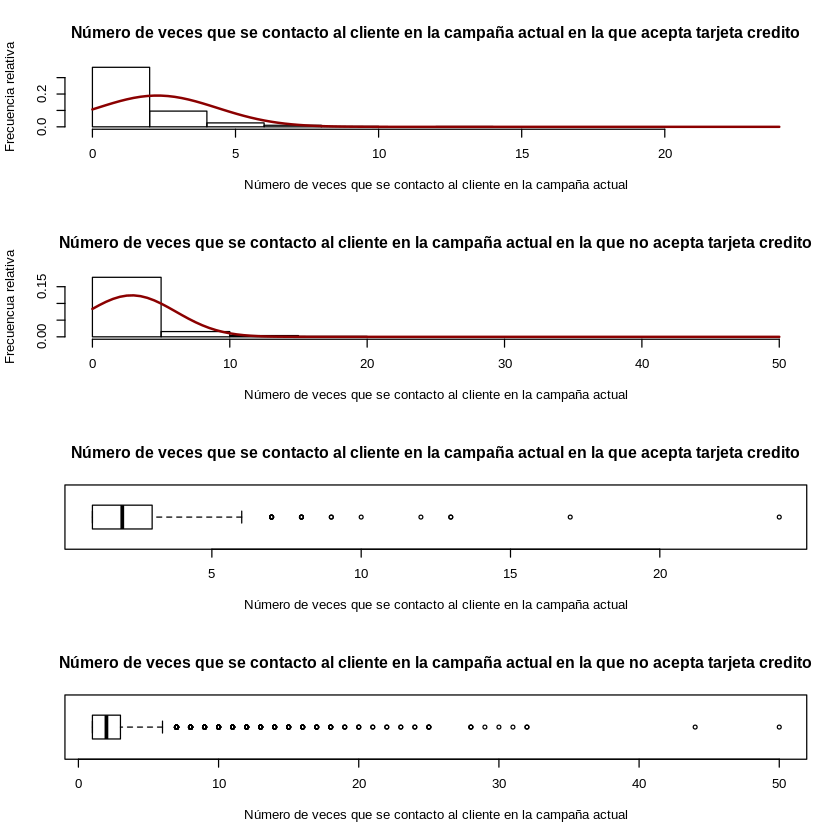

In [122]:
par(mfrow=c(4,1))
hist(cont_campana_actual[aceptacion_TC=="si"], freq = F, main="Número de veces que se contacto al cliente en la campaña actual en la que acepta tarjeta credito", xlab="Número de veces que se contacto al cliente en la campaña actual", ylab="Frecuencia relativa")
curve(dnorm(x,mean=mean(cont_campana_actual[aceptacion_TC=="si"]),sd=sd(cont_campana_actual[aceptacion_TC=="si"])), col="darkred",lwd=2, add=T)
hist(cont_campana_actual[aceptacion_TC=="no"], freq = F, main="Número de veces que se contacto al cliente en la campaña actual en la que no acepta tarjeta credito", xlab="Número de veces que se contacto al cliente en la campaña actual", ylab="Frecuencua relativa")
curve(dnorm(x,mean=mean(cont_campana_actual[aceptacion_TC=="no"]),sd=sd(cont_campana_actual[aceptacion_TC=="no"])), col="darkred",lwd=2, add=T)
diagrama_cont_campana_actual_si <- boxplot(cont_campana_actual[aceptacion_TC=="si"], main = "Número de veces que se contacto al cliente en la campaña actual en la que acepta tarjeta credito", horizontal = TRUE, xlab = "Número de veces que se contacto al cliente en la campaña actual" )
diagrama_cont_campana_actual_no <- boxplot(cont_campana_actual[aceptacion_TC=="no"], main = "Número de veces que se contacto al cliente en la campaña actual en la que no acepta tarjeta credito", horizontal = TRUE, xlab = "Número de veces que se contacto al cliente en la campaña actual" )


In [123]:
paste('Asimetria del número de veces que se contacto al cliente en la campaña actual de los que aceptaron la tarjeta: ', skew(cont_campana_actual[aceptacion_TC=="si"]))
paste('Curtosis del número de veces que se contacto al cliente en la campaña actual de los que aceptaron la tarjeta: ', kurtosi(cont_campana_actual[aceptacion_TC=="si"]))
paste('Asimetria del número de veces que se contacto al cliente en la campaña actual de los no que aceptaron la tarjeta: ', skew(cont_campana_actual[aceptacion_TC=="no"]))
paste('Curtosis del número de veces que se contacto al cliente en la campaña actual de los no que aceptaron la tarjeta: ', kurtosi(cont_campana_actual[aceptacion_TC=="no"]))

[1] "Asimetria del número de veces que se contacto al cliente en la campaña actual de los que aceptaron la tarjeta:  4.21200296891693"

[1] "Curtosis del número de veces que se contacto al cliente en la campaña actual de los que aceptaron la tarjeta:  29.602950380458"

[1] "Asimetria del número de veces que se contacto al cliente en la campaña actual de los no que aceptaron la tarjeta:  4.67227128727656"

[1] "Curtosis del número de veces que se contacto al cliente en la campaña actual de los no que aceptaron la tarjeta:  35.7277875626808"

Como podemos observar tanto en el caso de los que no aceptaron, como en el de los que aceptaron tenemos un comportamiento leptocurtico lo que nos dice que hay una muy alta concetracion de los valores respecto a la media, aunque levemente hay una mayor conc entracion en los que no aceptaron la tarjeta. Por otro lado entre menos contactaron al cliente más probable es que hayan aceptado la tarjeta. 

#### 5. Aceptación tarjeta de credito vs número de campañas previas en las que ha estado el cliente. 
A continuación se dan los resultados de las medidas de tendencia central y posición para el número de campañas previas en las que ha estado el cliente que aceptaron la tarjeta de crédito.

In [124]:
#Tendencia central y posicion
paste('Media:', mean(campanas_previas[aceptacion_TC=="si"]))
paste('Mediana:', median(campanas_previas[aceptacion_TC=="si"]))
paste('Moda:', mfv(campanas_previas[aceptacion_TC=="si"]))
print('Quantiles:')
quantile(campanas_previas[aceptacion_TC=="si"]) 

[1] "Media: 1.09021113243762"

[1] "Mediana: 0"

[1] "Moda: 0"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   0    0    0    2   14

Como sabemos, la media es suceptible a valores atípicos, por lo que para obtener un resultado más confiable, calculamos la media recortada al 20%. 

In [125]:
paste('Media con media recortada al 20%: ' , mean(campanas_previas[aceptacion_TC=="si"], trim = 0.2))

[1] "Media con media recortada al 20%:  0.348242811501597"

Lo que obtenemos es que haciendo una media recortada, el valor se acerca al de la mediana, la cúal es una medida robusta. Además hallamos un dato unimodal. 

A continuación tenemos los datos de dispersión.

In [126]:
#Dispersión:
paste('Rango del número de campañas previas en las que ha estado el cliente', range(campanas_previas[aceptacion_TC=="si"]))
paste('Rango intercuartilico del número de campañas previas en las que ha estado el cliente', IQR(campanas_previas[aceptacion_TC=="si"]))
paste('Varianza del número de campañas previas en las que ha estado el cliente', var(campanas_previas[aceptacion_TC=="si"]))

[1] "Rango del número de campañas previas en las que ha estado el cliente 0" 
[2] "Rango del número de campañas previas en las que ha estado el cliente 14"

[1] "Rango intercuartilico del número de campañas previas en las que ha estado el cliente 2"

[1] "Varianza del número de campañas previas en las que ha estado el cliente 4.22453860918352"

De donde podemos decir, que el 50% que ocupa la parte central de la distribución del número de campañas previas en las que ha estado el cliente de las personas que aceptaron la tarjeta, es mayor a 2 veces y menor a 4 veces, muy alejado del extremo mayor que son 14 veces. 

In [127]:
paste('El número de campañas previas en las que ha estado el cliente de las personas que aceptaron la tarjeta estan desviados de la media un: ', sd(campanas_previas[aceptacion_TC=="si"]), 'de la muestra')

[1] "El número de campañas previas en las que ha estado el cliente de las personas que aceptaron la tarjeta estan desviados de la media un:  2.05536824174733 de la muestra"

Es decir, en promedio, el número de campañas previas en las que ha estado el cliente en este caso se encuentran a 2.06 veces del número de campañas previas en las que ha estado el cliente media de la muestra. 

In [128]:
limiteSup<-mean(campanas_previas[aceptacion_TC=="si"])+sd(dia[aceptacion_TC=="si"])
limiteInf<-mean(campanas_previas[aceptacion_TC=="si"])-sd(campanas_previas[aceptacion_TC=="si"])
paste('El número de campañas previas en las que ha estado el cliente que aceptaron la tarjeta estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "El número de campañas previas en las que ha estado el cliente que aceptaron la tarjeta estan a una desviacion estandar de la media son:"

[1] "X-s:  -0.965157109309713"

[1] "X+s:  9.32535932367142"

Los anteriores datos nos ayudan a encontrar el porcentaje del número de campañas previas en las que ha estado el cliente que aceptaron la tarjeta que esta a menos de una desviacion estandar de la muestra y la cantidad de clientes que corresponde a este porcentaje.

In [129]:
total <- sum(campanas_previas[aceptacion_TC=="si"]>limiteInf & campanas_previas[aceptacion_TC=="si"]<limiteSup)
n <- length(campanas_previas[aceptacion_TC=="si"])
porcampanas_previasSi <- total/n
numClientescampanas_previasSi<-sum(campanas_previas[aceptacion_TC=="si"]>limiteInf & campanas_previas[aceptacion_TC=="si"]<limiteSup)
paste('La cantidad del número de campañas previas en las que ha estado el cliente que esta a una desviación estandar son de:',
      numClientescampanas_previasSi , 
      'y corresponde a un porcentaje de:', porcampanas_previasSi)

[1] "La cantidad del número de campañas previas en las que ha estado el cliente que esta a una desviación estandar son de: 516 y corresponde a un porcentaje de: 0.990403071017274"

Así, el 99.04% del número de campañas previas en las que ha estado el cliente que aceptaron la tarjeta esta a menos de una desviación del número de campañas previas en las que ha estado el cliente promedio de la muestra. Por otro lado, para poder hacer un análsis correspondiente entre datos en tanto a la variación de la muestra, hallamos su coeficiente de variación. 

In [130]:
cv <- sd(campanas_previas[aceptacion_TC=="si"])/mean(campanas_previas[aceptacion_TC=="si"])*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  188.529375695486"


Ahora hallaremos, las medidas de tendencia central y posicion para el número de campañas previas en las que ha estado el cliente de las personas que por el contrario, *no aceptaron* la tarjeta de crédito.

In [131]:
#Tendencia central y posicion
paste('Media:', mean(campanas_previas[aceptacion_TC=="no"]))
paste('Mediana:', median(campanas_previas[aceptacion_TC=="no"]))
paste('Moda:', mfv(campanas_previas[aceptacion_TC=="no"]))
print('Quantiles:')
quantile(campanas_previas[aceptacion_TC=="no"]) 

[1] "Media: 0.47125"

[1] "Mediana: 0"

[1] "Moda: 0"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   0    0    0    0   25

Como sabemos, la media es suceptible a valores atípicos, por lo que para obtener un resultado más confiable, calculamos la media recortada al 20%. 

In [132]:
paste('Media con media recortada al 20%: ' , mean(campanas_previas[aceptacion_TC=="no"], trim = 0.2))

[1] "Media con media recortada al 20%:  0"

Lo que obtenemos es que haciendo una media recortada, el valor se acerca aún más al de la mediana, la cúal es una medida robusta. Además hallamos un dato unimodal. Comparando con los que aceptaron, tenemo un promedio sin recortar diferente.

A continuación tenemos los datos de dispersión.

In [133]:
#Dispersión:
paste('Rango del número de campañas previas en las que ha estado el cliente', range(campanas_previas[aceptacion_TC=="no"]))
paste('Rango intercuartilico del número de campañas previas en las que ha estado el cliente', IQR(campanas_previas[aceptacion_TC=="no"]))
paste('Varianza del número de campañas previas en las que ha estado el cliente', var(campanas_previas[aceptacion_TC=="no"]))

[1] "Rango del número de campañas previas en las que ha estado el cliente 0" 
[2] "Rango del número de campañas previas en las que ha estado el cliente 25"

[1] "Rango intercuartilico del número de campañas previas en las que ha estado el cliente 0"

[1] "Varianza del número de campañas previas en las que ha estado el cliente 2.64833552138035"

De donde podemos decir, que el 50% que ocupa la parte central de la distribución del número de veces que se contacto al cliente en la campaña actual de las personas que no aceptaron la tarjeta, es 0 veces. Lo que comparando con el rango intercuartilico de las personas que si aceptaron la tarjeta, tenemos un mismo rango intercuartilico menor. Además el valor extremo de los que no aceptaron es muy alto, por lo que podemos decir que existen personas de las que no aceptaron que estuvieron inclusive en 25 capañas previas. 

In [134]:
paste('El número de campañas previas en las que ha estado el cliente de los clientes que no aceptaron la tarjeta estan desviados de la media un: ', sd(campanas_previas[aceptacion_TC=="no"]), 'de la muestra')

[1] "El número de campañas previas en las que ha estado el cliente de los clientes que no aceptaron la tarjeta estan desviados de la media un:  1.62737073876248 de la muestra"

Es decir, en promedio, el número de campañas previas en las que ha estado el cliente en este caso se encuentran a 1.62 desviaciones del número de campañas previas en las que ha estado el cliente media de la muestra. 

In [135]:
limiteSup<-mean(campanas_previas[aceptacion_TC=="no"])+sd(campanas_previas[aceptacion_TC=="no"])
limiteInf<-mean(campanas_previas[aceptacion_TC=="no"])-sd(campanas_previas[aceptacion_TC=="no"])
paste('El número de campañas previas en las que ha estado el cliente de los clientes que no aceptaron la tarjeta estan a una desviacion estandar de la media son:')
paste('X-s: ', limiteInf)
paste('X+s: ', limiteSup)

[1] "El número de campañas previas en las que ha estado el cliente de los clientes que no aceptaron la tarjeta estan a una desviacion estandar de la media son:"

[1] "X-s:  -1.15612073876248"

[1] "X+s:  2.09862073876248"

Los anteriores datos nos ayudan a encontrar el porcentaje del número de campañas previas en las que ha estado el cliente de las personas que no aceptaron la tarjeta que esta a menos de una desviacion estandar de la muestra y la cantidad de clientes que corresponde a este porcentaje.

In [136]:
total <- sum(campanas_previas[aceptacion_TC=="no"]>limiteInf & campanas_previas[aceptacion_TC=="no"]<limiteSup)
n <- length(campanas_previas[aceptacion_TC=="no"])
porcampanas_previasNo <- total/n
numClientescampanas_previasNo<-sum(campanas_previas[aceptacion_TC=="no"]>limiteInf & campanas_previas[aceptacion_TC=="no"]<limiteSup)
paste('La cantidad de clientes que esta a una desviación estandar son de:',
      numClientescampanas_previasNo , 
      'y corresponde a un porcentaje de:', porcampanas_previasNo)

[1] "La cantidad de clientes que esta a una desviación estandar son de: 3746 y corresponde a un porcentaje de: 0.9365"

Así, el 93.65% de número de campañas previas en las que ha estado el cliente que aceptaron la tarjeta esta a menos de una desviación del número de campañas previas en las que ha estado el cliente promedio de la muestra. Por otro lado, para poder hacer un análsis correspondiente entre datos en tanto a la variación de la muestra, hallamos su coeficiente de variación. 

In [137]:
cv <- sd(campanas_previas[aceptacion_TC=="no"])/mean(campanas_previas[aceptacion_TC=="no"])*100
paste('El coeficiente de variacion es de: ', cv)

[1] "El coeficiente de variacion es de:  345.330660745354"

Como podemos ver, el número de campañas previas en las que han estado los clientes que aceptaron y no la tarjeta del banco, tiene una dispersión muy grande aunque notoriamente mayor en el caso de los que no aceptaron, casi duplicando el valor. 

Según la gráfica comparando si las personas aceptaron o no una tarjeta de credito según el número de campañas previas en las que ha estado el cliente se puede concluir que aunque en los dos casos tenemos una asimetria positiva, es aún más marcada en el caso de los que no aceptaron, lo que nos dice, que los que no aceptaron estuvieron con menos frecuencia en un mayor número de campañas previas.

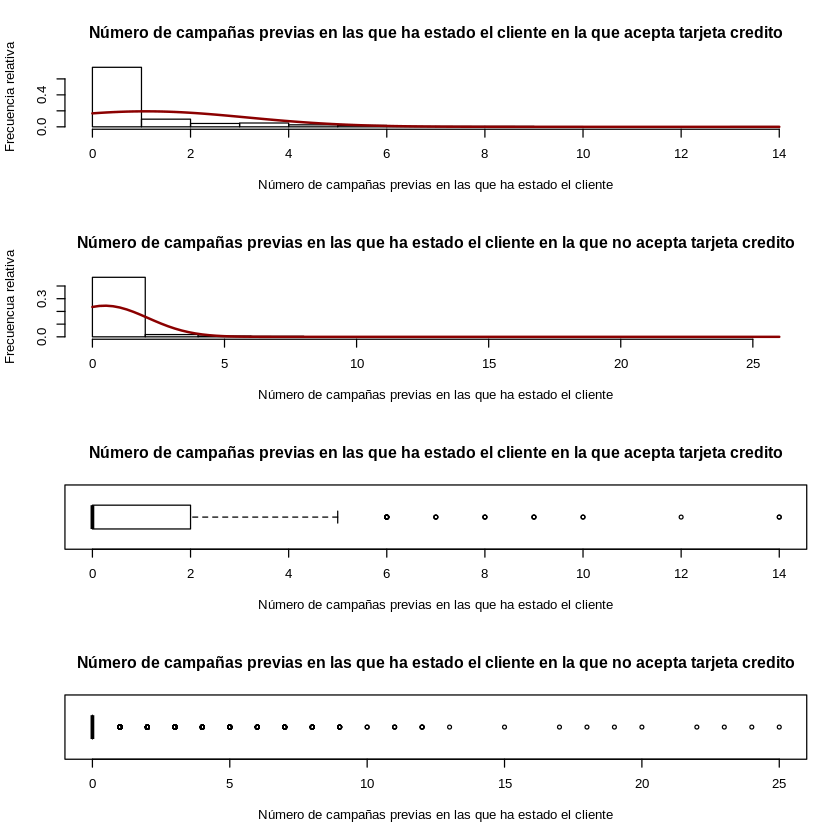

In [138]:
par(mfrow=c(4,1))
hist(campanas_previas[aceptacion_TC=="si"], freq = F, main="Número de campañas previas en las que ha estado el cliente en la que acepta tarjeta credito", xlab="Número de campañas previas en las que ha estado el cliente", ylab="Frecuencia relativa")
curve(dnorm(x,mean=mean(campanas_previas[aceptacion_TC=="si"]),sd=sd(campanas_previas[aceptacion_TC=="si"])), col="darkred",lwd=2, add=T)
hist(campanas_previas[aceptacion_TC=="no"], freq = F, main="Número de campañas previas en las que ha estado el cliente en la que no acepta tarjeta credito", xlab="Número de campañas previas en las que ha estado el cliente", ylab="Frecuencua relativa")
curve(dnorm(x,mean=mean(campanas_previas[aceptacion_TC=="no"]),sd=sd(campanas_previas[aceptacion_TC=="no"])), col="darkred",lwd=2, add=T)
diagrama_campanas_previas_si <- boxplot(campanas_previas[aceptacion_TC=="si"], main = "Número de campañas previas en las que ha estado el cliente en la que acepta tarjeta credito", horizontal = TRUE, xlab = "Número de campañas previas en las que ha estado el cliente" )
diagrama_campanas_previas_no <- boxplot(campanas_previas[aceptacion_TC=="no"], main = "Número de campañas previas en las que ha estado el cliente en la que no acepta tarjeta credito", horizontal = TRUE, xlab = "Número de campañas previas en las que ha estado el cliente" )

In [139]:
paste('Asimetria del número de campañas previas en las que han estado los clientes de los que aceptaron la tarjeta: ', skew(campanas_previas[aceptacion_TC=="si"]))
paste('Curtosis del número de campañas previas en las que han estado los clientes de los que aceptaron la tarjeta: ', kurtosi(campanas_previas[aceptacion_TC=="si"]))
paste('Asimetria del número de campañas previas en las que han estado los clientes de los no que aceptaron la tarjeta: ', skew(campanas_previas[aceptacion_TC=="no"]))
paste('Curtosis del número de campañas previas en las que han estado los clientes de los no que aceptaron la tarjeta: ', kurtosi(campanas_previas[aceptacion_TC=="no"]))

[1] "Asimetria del número de campañas previas en las que han estado los clientes de los que aceptaron la tarjeta:  2.72381815923161"

[1] "Curtosis del número de campañas previas en las que han estado los clientes de los que aceptaron la tarjeta:  9.41401861816484"

[1] "Asimetria del número de campañas previas en las que han estado los clientes de los no que aceptaron la tarjeta:  6.68169973426414"

[1] "Curtosis del número de campañas previas en las que han estado los clientes de los no que aceptaron la tarjeta:  65.7358414531488"

Como podemos observar tanto en el caso de los que no aceptaron, como en el de los que aceptaron tenemos un comportamiento leptocurtico lo que nos dice que hay una muy alta concetracion de los valores respecto a la media, pero en el caso de los que no aceptaron es muchisimo mayor.. 

#### 6. Medio de contacto vs contrato meses


A continuacion se dan los resultados de las medidas de tendencia central y posicion para el numero de meses de contrato y el medio de contacto.
Se puede ver que la media y la mediana en ambos casos estuvieron muy cercanos mientras que en la moda hay las siguientes variaciones: 
1. La moda de las personas contratadas por celular es de 6 meses
2. La moda de las personas contratadas por chat es de 13 meses
3. La moda de las personas contratadas por telefono es de 52 meses



In [140]:
#Tendencia central y posicion
paste('Media de celular:', mean(contrato_meses[medio_contacto=="celular"]))
paste('Media de chat:', mean(contrato_meses[medio_contacto=="chat"]))
paste('Media de telefono:', mean(contrato_meses[medio_contacto=="telefono"]))
paste('Mediana de celular:', median(contrato_meses[medio_contacto=="celular"]))
paste('Mediana de chat:', median(contrato_meses[medio_contacto=="chat"]))
paste('Mediana de telefono:', median(contrato_meses[medio_contacto=="telefono"]))
paste('Moda de celular:', mfv(contrato_meses[medio_contacto=="celular"]))
paste('Moda de chat:', mfv(contrato_meses[medio_contacto=="chat"]))
paste('Moda de telefono:', mfv(contrato_meses[medio_contacto=="telefono"]))
print('Quantiles:')
quantile(contrato_meses[medio_contacto=="celular"]) 
quantile(contrato_meses[medio_contacto=="chat"]) 
quantile(contrato_meses[medio_contacto=="telefono"]) 

[1] "Media de celular: 36.828729281768"

[1] "Media de chat: 35.3247734138973"

[1] "Media de telefono: 35.0830564784053"

[1] "Mediana de celular: 37"

[1] "Mediana de chat: 34"

[1] "Mediana de telefono: 34"

[1] "Moda de celular: 6"

[1] "Moda de chat: 13"

[1] "Moda de telefono: 52"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   1   19   37   55   72

0%  25%  50%  75% 100% 
   1   17   34   52   72

0%  25%  50%  75% 100% 
   1   18   34   52   72

Con los datos de dispersion que se comportan de manera similar

In [141]:
#Dispersión:
paste('Rango del contrato en meses en personas contactadas por telefono', range(contrato_meses[medio_contacto=="telefono"]))
paste('Rango del contrato en meses en personas contactadas por chat', range(contrato_meses[medio_contacto=="chat"]))
paste('Rango del contrato en meses en personas contactadas por telefono', range(contrato_meses[medio_contacto=="telefono"]))
paste('Rango intercuartilico del contrato en meses en personas contactadas por telefono', IQR(contrato_meses[medio_contacto=="telefono"]))
paste('Rango intercuartilico del contrato en meses en personas contactadas por chat', IQR(contrato_meses[medio_contacto=="chat"]))
paste('Rango intercuartilico del contrato en meses en personas contactadas por telefono', IQR(contrato_meses[medio_contacto=="telefono"]))
paste('Varianza del contrato en meses en personas contactadas por telefonos', var(contrato_meses[medio_contacto=="telefono"]))
paste('Varianza del contrato en meses en personas contactadas por chats', var(contrato_meses[medio_contacto=="chat"]))
paste('Varianza del contrato en meses en personas contactadas por telegonos', var(contrato_meses[medio_contacto=="telefono"]))

[1] "Rango del contrato en meses en personas contactadas por telefono 1" 
[2] "Rango del contrato en meses en personas contactadas por telefono 72"

[1] "Rango del contrato en meses en personas contactadas por chat 1" 
[2] "Rango del contrato en meses en personas contactadas por chat 72"

[1] "Rango del contrato en meses en personas contactadas por telefono 1" 
[2] "Rango del contrato en meses en personas contactadas por telefono 72"

[1] "Rango intercuartilico del contrato en meses en personas contactadas por telefono 34"

[1] "Rango intercuartilico del contrato en meses en personas contactadas por chat 35"

[1] "Rango intercuartilico del contrato en meses en personas contactadas por telefono 34"

[1] "Varianza del contrato en meses en personas contactadas por telefonos 412.276411960133"

[1] "Varianza del contrato en meses en personas contactadas por chats 415.005553614531"

[1] "Varianza del contrato en meses en personas contactadas por telegonos 412.276411960133"

Desviacion estandar

In [142]:
paste('En número de meses del contrato de las personas contactadas por telefono estan desviados de la media un: ', sd(contrato_meses[medio_contacto=="telefono"]), 'de la muestra')
paste('En número de meses del contrato de las personas contactadas por chat desviados de la media un: ', sd(contrato_meses[medio_contacto=="chat"]), 'de la muestra')
paste('En número de meses del contrato de las personas contactadas por telefono desviados de la media un: ', sd(contrato_meses[medio_contacto=="telefono"]), 'de la muestra')

[1] "En número de meses del contrato de las personas contactadas por telefono estan desviados de la media un:  20.3045909084653 de la muestra"

[1] "En número de meses del contrato de las personas contactadas por chat desviados de la media un:  20.371685095115 de la muestra"

[1] "En número de meses del contrato de las personas contactadas por telefono desviados de la media un:  20.3045909084653 de la muestra"

Por las graficas se puede ver que se comporta de manera casi uniforme excepto por la cola los ultimos meses.
Se puede ver que la mayoria de los clientes fueron por celular siendo el canal mas efectivo seguido por el chat. Para cuando son una gran cantidad de meses se  puede ver que hay una menor cantidad de clientes.

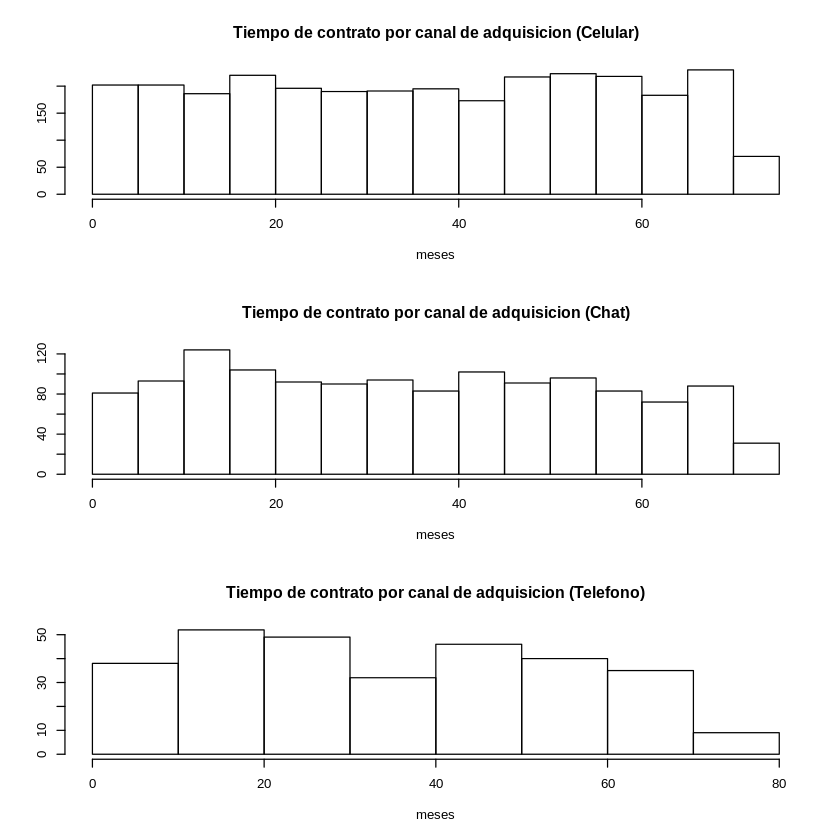

In [143]:
par(mfrow=c(3,1))
hist(contrato_meses[medio_contacto=="celular"], main="Tiempo de contrato por canal de adquisicion (Celular)", xlab="meses", ylab="")
hist(contrato_meses[medio_contacto=="chat"], main="Tiempo de contrato por canal de adquisicion (Chat)", xlab="meses", ylab="")
hist(contrato_meses[medio_contacto=="telefono"], main="Tiempo de contrato por canal de adquisicion (Telefono)", xlab="meses", ylab="")

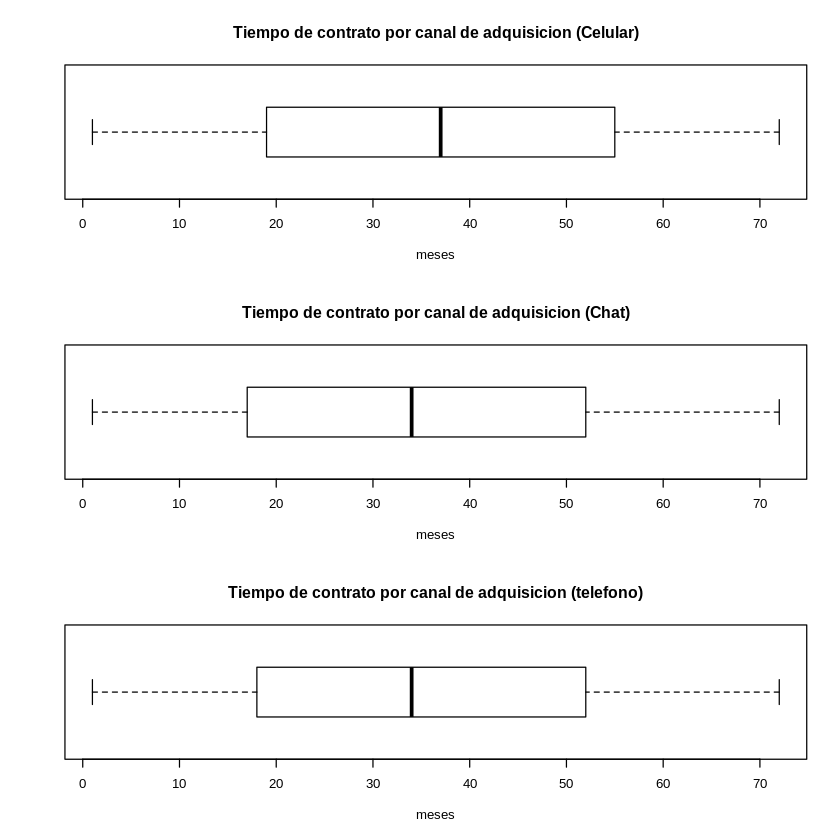

In [144]:
par(mfrow=c(3,1))
diagrama_contrato_meses_si <- boxplot(contrato_meses[medio_contacto=="celular"], main = "Tiempo de contrato por canal de adquisicion (Celular)", horizontal = TRUE, xlab = "meses" )
diagrama_contrato_meses_no <- boxplot(contrato_meses[medio_contacto=="chat"], main = "Tiempo de contrato por canal de adquisicion (Chat)", horizontal = TRUE, xlab = "meses" )
diagrama_contrato_meses_no <- boxplot(contrato_meses[medio_contacto=="telefono"], main = "Tiempo de contrato por canal de adquisicion (telefono)", horizontal = TRUE, xlab = "meses" )

In [145]:
paste('Asimetria de meses por personas contactadas por celular:', skew(contrato_meses[medio_contacto=="celular"]))
paste('Curtosis de meses por personas  contactadas por celular:', kurtosi(contrato_meses[medio_contacto=="celular"]))
paste('Asimetria de meses por personas contactadas por chat: ', skew(contrato_meses[medio_contacto=="chat"]))
paste('Curtosis de meses por personas  contactadas por chat: ', kurtosi(contrato_meses[medio_contacto=="chat"]))
paste('Asimetria de meses por personas contactadas por telefono: ', skew(contrato_meses[medio_contacto=="telefono"]))
paste('Curtosis de meses por personas  contactadas por telefono: ', kurtosi(contrato_meses[medio_contacto=="telefono"]))

[1] "Asimetria de meses por personas contactadas por celular: -0.0356993540343606"

[1] "Curtosis de meses por personas  contactadas por celular: -1.2256242149607"

[1] "Asimetria de meses por personas contactadas por chat:  0.0921256834540912"

[1] "Curtosis de meses por personas  contactadas por chat:  -1.18916295538424"

[1] "Asimetria de meses por personas contactadas por telefono:  0.11573701656366"

[1] "Curtosis de meses por personas  contactadas por telefono:  -1.17405483412182"

Como podemos ver los datos la curtosis en ambos casos es negativa por lo tanto es platicurtica. Mientras que para la asimetria hay dos variaciones:

1. Para las ppersonas contactadas por celular la asimetria es levemente negativa
2. Para las ppersonas contactadas por celular la asimetria es levemente positiva


#### 7. Medio de contacto vs dia

A continuacion se dan los resultados de las medidas de tendencia central y posicion para el numero segun el dia de contacto y el medio de contacto.

Se puede ver que la moda de contacto para los clientes por medio de celular y de celular es para mitad de mes, mientras que por telefono es a finales de mes.
De resto la media y la mediana se comportan de manera muy similar siendo a mitad de mes siendo los dias 15,16 y 17. 

In [146]:
#Tendencia central y posicion
paste('Media por celular:', mean(dia[medio_contacto=="celular"]))
paste('Media por chat:', mean(dia[medio_contacto=="chat"]))
paste('Media por telefono:', mean(dia[medio_contacto=="telefono"]))
paste('Mediana por celular:', median(dia[medio_contacto=="celular"]))
paste('Mediana por chat:', median(dia[medio_contacto=="chat"]))
paste('Mediana por telefono:', median(dia[medio_contacto=="telefono"]))
paste('Moda por celular:', mfv(dia[medio_contacto=="celular"]))
paste('Moda por chat:', mfv(dia[medio_contacto=="chat"]))
paste('Moda por telefono:', mfv(dia[medio_contacto=="telefono"]))
print('Quantiles:')
quantile(dia[medio_contacto=="celular"]) 
quantile(dia[medio_contacto=="chat"]) 
quantile(dia[medio_contacto=="telefono"]) 

[1] "Media por celular: 16.0255524861878"

[1] "Media por chat: 15.2983383685801"

[1] "Media por telefono: 17.5681063122924"

[1] "Mediana por celular: 16"

[1] "Mediana por chat: 15"

[1] "Mediana por telefono: 18"

[1] "Moda por celular: 18"

[1] "Moda por chat: 20"

[1] "Moda por telefono: 28"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   1    9   16   21   31

0%  25%  50%  75% 100% 
   1    7   15   21   31

0%  25%  50%  75% 100% 
   2   10   18   25   31

Con los datos de dispersion que se comportan de manera similar

In [147]:
#Dispersión:
paste('Rango del dia de contacto por medio de celular', range(dia[medio_contacto=="celular"]))
paste('Rango del dia de contacto por medio de chat', range(dia[medio_contacto=="chat"]))
paste('Rango del dia de contacto por medio de telefono', range(dia[medio_contacto=="telefono"]))
paste('Rango intercuartilico del dia de contacto por medio de celular', IQR(dia[medio_contacto=="celular"]))
paste('Rango intercuartilico del dia de contacto por medio de chat', IQR(dia[medio_contacto=="chat"]))
paste('Rango intercuartilico del dia de contacto por medio de telefono', IQR(dia[medio_contacto=="telefono"]))
paste('Varianza del dia de contacto por medio de celular', var(dia[medio_contacto=="celular"]))
paste('Varianza del dia de contacto por medio de chat', var(dia[medio_contacto=="chat"]))
paste('Varianza del dia de contacto por medio de telefono', var(dia[medio_contacto=="telefono"]))

[1] "Rango del dia de contacto por medio de celular 1" 
[2] "Rango del dia de contacto por medio de celular 31"

[1] "Rango del dia de contacto por medio de chat 1" 
[2] "Rango del dia de contacto por medio de chat 31"

[1] "Rango del dia de contacto por medio de telefono 2" 
[2] "Rango del dia de contacto por medio de telefono 31"

[1] "Rango intercuartilico del dia de contacto por medio de celular 12"

[1] "Rango intercuartilico del dia de contacto por medio de chat 14"

[1] "Rango intercuartilico del dia de contacto por medio de telefono 15"

[1] "Varianza del dia de contacto por medio de celular 64.7965834597658"

[1] "Varianza del dia de contacto por medio de chat 72.7098687410513"

[1] "Varianza del dia de contacto por medio de telefono 74.4195127353267"

Desviacion estandar

In [148]:
paste('El dia de contacto a los clientes por medio de celular estan desviados de la media un: ', sd(dia[medio_contacto=="celular"]), 'de la muestra')
paste('El dia de contacto a los clientes por medio de chat estan desviados de la media un: ', sd(dia[medio_contacto=="chat"]), 'de la muestra')
paste('El dia de contacto a los clientes por medio de telefono estan desviados de la media un: ', sd(dia[medio_contacto=="telefono"]), 'de la muestra')

[1] "El dia de contacto a los clientes por medio de celular estan desviados de la media un:  8.04963250464056 de la muestra"

[1] "El dia de contacto a los clientes por medio de chat estan desviados de la media un:  8.5270081940298 de la muestra"

[1] "El dia de contacto a los clientes por medio de telefono estan desviados de la media un:  8.62667448877762 de la muestra"

Como se puede ver en las graficas las solicitudes de las tarjetas de credito al principio y a final de mes se comporta muy similar en el caso de el celular y chat como canal de adquisicion

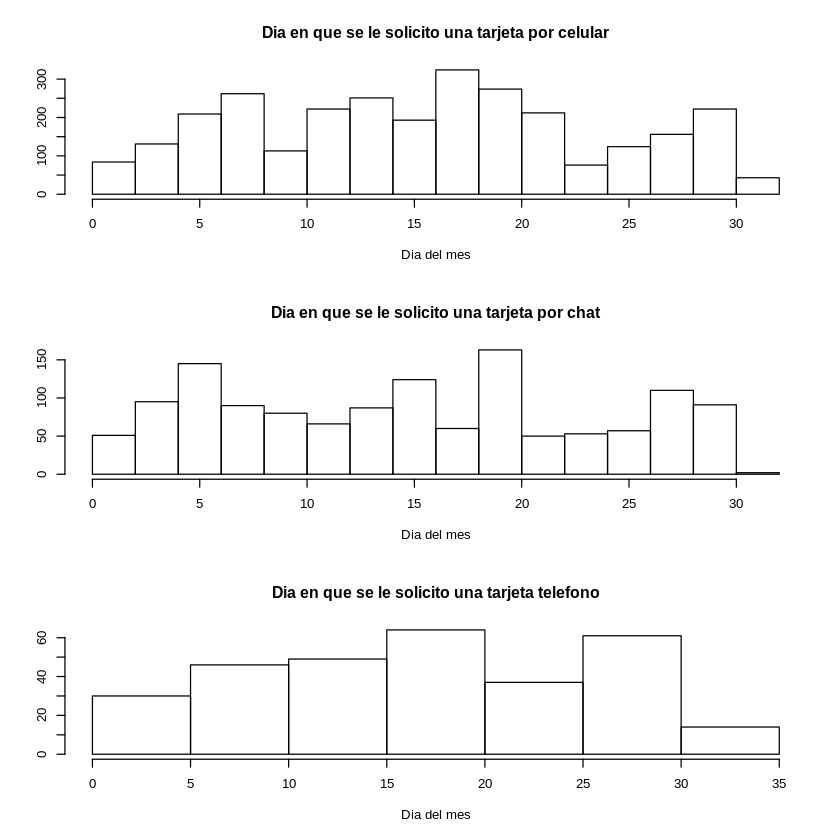

In [149]:
par(mfrow=c(3,1))
hist(dia[medio_contacto=="celular"], main="Dia en que se le solicito una tarjeta por celular", xlab="Dia del mes", ylab="")
hist(dia[medio_contacto=="chat"], main="Dia en que se le solicito una tarjeta por chat", xlab="Dia del mes", ylab="")
hist(dia[medio_contacto=="telefono"], main="Dia en que se le solicito una tarjeta telefono", xlab="Dia del mes", ylab="")

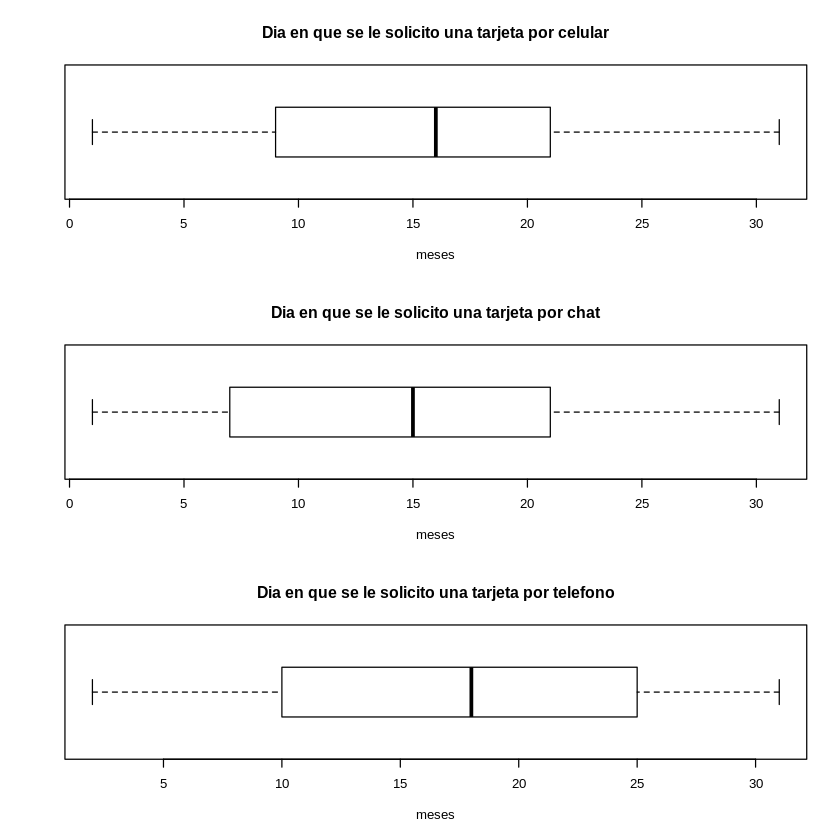

In [150]:
par(mfrow=c(3,1))
diagrama_dia_si <- boxplot(dia[medio_contacto=="celular"], main = "Dia en que se le solicito una tarjeta por celular", horizontal = TRUE, xlab = "meses" )
diagrama_dia_no <- boxplot(dia[medio_contacto=="chat"], main = "Dia en que se le solicito una tarjeta por chat", horizontal = TRUE, xlab = "meses" )
diagrama_dia_no <- boxplot(dia[medio_contacto=="telefono"], main = "Dia en que se le solicito una tarjeta por telefono", horizontal = TRUE, xlab = "meses" )

In [151]:
paste('Asimetria dia de contacto con el cliente por celular:', skew(dia[medio_contacto=="celular"]))
paste('Curtosis  dia de contacto con el cliente por celular:', kurtosi(dia[medio_contacto=="celular"]))
paste('Asimetria dia de contacto con el cliente por chat: ', skew(dia[medio_contacto=="chat"]))
paste('Curtosis  dia de contacto con el cliente por chat: ', kurtosi(dia[medio_contacto=="chat"]))
paste('Asimetria dia de contacto con el cliente por telefono: ', skew(dia[medio_contacto=="telefono"]))
paste('Curtosis  dia de contacto con el cliente por telefono: ', kurtosi(dia[medio_contacto=="telefono"]))

[1] "Asimetria dia de contacto con el cliente por celular: 0.0984084921836184"

[1] "Curtosis  dia de contacto con el cliente por celular: -0.961977183312145"

[1] "Asimetria dia de contacto con el cliente por chat:  0.124064554223839"

[1] "Curtosis  dia de contacto con el cliente por chat:  -1.18037055466267"

[1] "Asimetria dia de contacto con el cliente por telefono:  -0.0331120328419336"

[1] "Curtosis  dia de contacto con el cliente por telefono:  -1.14045219901493"

Como se puede apreciar la curtosis de los tres medios de contacto se comportan de manera muy similar siendo para ambos casos platicurtica. Para la asimetria encontramos dos casos:
1. Para el medio de contacto por celular y chat se puede ver que es levemente asimetrica positivamente
2. Para el medio de contacto por telefono se puede ver que es levemente asimetrica negativa

#### 8. Nivel educativo vs contrato por meses

Con las medidas de tendencias se puede ver que la media y la mediana son muy cercanas mientras que las modas varian demasiado, de mayor a menor la duracion de los contratos segun el nivel educativo es de:
1. Tecnico: 61 meses
2. Universitario: 54 meses 
3. Primaria: 52 meses 
4. Bachillero: 6 meses

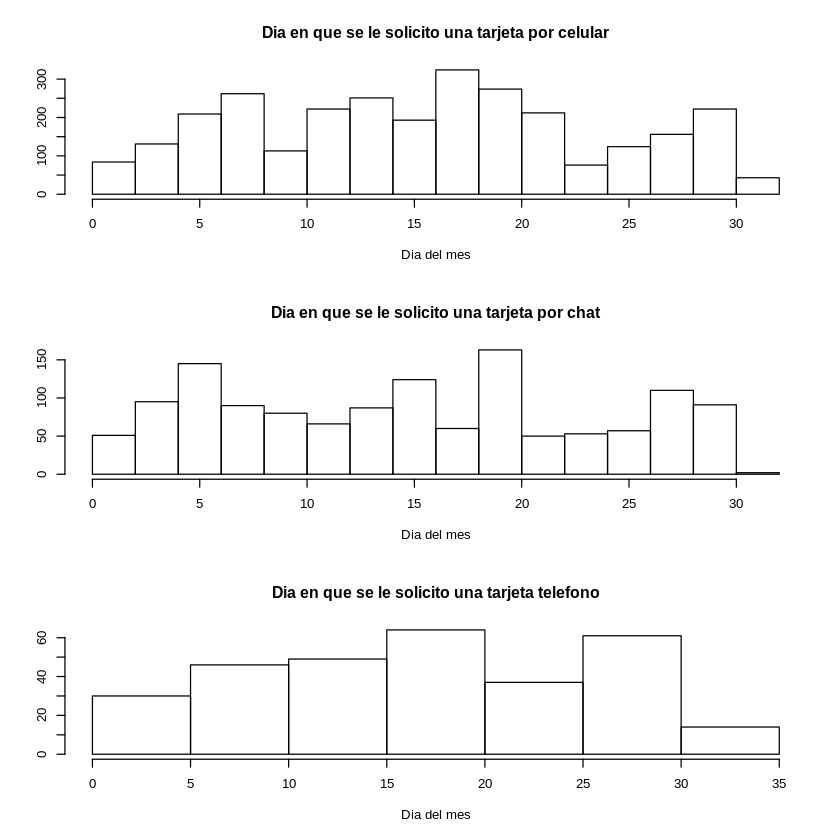

In [152]:
par(mfrow=c(3,1))
hist(dia[medio_contacto=="celular"], main="Dia en que se le solicito una tarjeta por celular", xlab="Dia del mes", ylab="")
hist(dia[medio_contacto=="chat"], main="Dia en que se le solicito una tarjeta por chat", xlab="Dia del mes", ylab="")
hist(dia[medio_contacto=="telefono"], main="Dia en que se le solicito una tarjeta telefono", xlab="Dia del mes", ylab="")

In [153]:
#Tendencia central y posicion
paste('Media de primaria:', mean(contrato_meses[nivel_educativo=="primaria"]))
paste('Media de bachillerato:', mean(contrato_meses[nivel_educativo=="bachillerato"]))
paste('Media de universitario:', mean(contrato_meses[nivel_educativo=="universitario"]))
paste('Media de técnico:', mean(contrato_meses[nivel_educativo=="técnico"]))
paste('Mediana de primaria:', median(contrato_meses[nivel_educativo=="primaria"]))
paste('Mediana de bachillerato:', median(contrato_meses[nivel_educativo=="bachillerato"]))
paste('Mediana de universitario:', median(contrato_meses[nivel_educativo=="universitario"]))
paste('Mediana de técnico:', median(contrato_meses[nivel_educativo=="técnico"]))
paste('Moda de primaria:', mfv(contrato_meses[nivel_educativo=="primaria"]))
paste('Moda de bachillerato:', mfv(contrato_meses[nivel_educativo=="bachillerato"]))
paste('Moda de universitario:', mfv(contrato_meses[nivel_educativo=="universitario"]))
paste('Moda de técnico:', mfv(contrato_meses[nivel_educativo=="técnico"]))
print('Quantiles:')
quantile(contrato_meses[nivel_educativo=="primaria"]) 
quantile(contrato_meses[nivel_educativo=="bachillerato"]) 
quantile(contrato_meses[nivel_educativo=="universitario"]) 
quantile(contrato_meses[nivel_educativo=="técnico"]) 

[1] "Media de primaria: 34.7566371681416"

[1] "Media de bachillerato: 36.3898525585429"

[1] "Media de universitario: 36.6792592592593"

[1] "Media de técnico: 37.3743315508021"

[1] "Mediana de primaria: 33"

[1] "Mediana de bachillerato: 36"

[1] "Mediana de universitario: 37"

[1] "Mediana de técnico: 37"

[1] "Moda de primaria: 52"

[1] "Moda de bachillerato: 6"

[1] "Moda de universitario: 54"

[1] "Moda de técnico: 61"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   1   17   33   52   72

0%  25%  50%  75% 100% 
   1   19   36   54   72

0%  25%  50%  75% 100% 
   1   18   37   55   72

0%  25%  50%  75% 100% 
   1   21   37   55   72

Con los datos de dispersion que se comportan de manera similar

In [154]:
#Dispersión:
paste('Rango del contrato en meses en personas primaria', range(contrato_meses[nivel_educativo=="primaria"]))
paste('Rango del contrato en meses en personas bachillerato', range(contrato_meses[nivel_educativo=="bachillerato"]))
paste('Rango del contrato en meses en personas universitario', range(contrato_meses[nivel_educativo=="universitario"]))
paste('Rango del contrato en meses en personas técnico', range(contrato_meses[nivel_educativo=="técnico"]))
paste('Rango intercuartilico del contrato en meses en personas primaria', IQR(contrato_meses[nivel_educativo=="primaria"]))
paste('Rango intercuartilico del contrato en meses en personas bachillerato', IQR(contrato_meses[nivel_educativo=="bachillerato"]))
paste('Rango intercuartilico del contrato en meses en personas universitario', IQR(contrato_meses[nivel_educativo=="universitario"]))
paste('Rango intercuartilico del contrato en meses en personas técnico', IQR(contrato_meses[nivel_educativo=="técnico"]))
paste('Varianza del contrato en meses en personas primaria', var(contrato_meses[nivel_educativo=="primaria"]))
paste('Varianza del contrato en meses en personas bachillerato', var(contrato_meses[nivel_educativo=="bachillerato"]))
paste('Varianza del contrato en meses en personas universitario', var(contrato_meses[nivel_educativo=="universitario"]))
paste('Varianza del contrato en meses en personas técnico', var(contrato_meses[nivel_educativo=="técnico"]))

[1] "Rango del contrato en meses en personas primaria 1" 
[2] "Rango del contrato en meses en personas primaria 72"

[1] "Rango del contrato en meses en personas bachillerato 1" 
[2] "Rango del contrato en meses en personas bachillerato 72"

[1] "Rango del contrato en meses en personas universitario 1" 
[2] "Rango del contrato en meses en personas universitario 72"

[1] "Rango del contrato en meses en personas técnico 1" 
[2] "Rango del contrato en meses en personas técnico 72"

[1] "Rango intercuartilico del contrato en meses en personas primaria 35"

[1] "Rango intercuartilico del contrato en meses en personas bachillerato 35"

[1] "Rango intercuartilico del contrato en meses en personas universitario 37"

[1] "Rango intercuartilico del contrato en meses en personas técnico 34"

[1] "Varianza del contrato en meses en personas primaria 429.593567404348"

[1] "Varianza del contrato en meses en personas bachillerato 423.923003275432"

[1] "Varianza del contrato en meses en personas universitario 444.390006863795"

[1] "Varianza del contrato en meses en personas técnico 392.418262319591"

Desviacion estandar

In [155]:
paste('En número de meses del contrato de las personas con un primaria estan desviados de la media un: ', sd(contrato_meses[nivel_educativo=="primaria"]), 'de la muestra')
paste('En número de meses del contrato de las personas con un bachillerato estan desviados de la media un: ', sd(contrato_meses[nivel_educativo=="bachillerato"]), 'de la muestra')
paste('En número de meses del contrato de las personas con un universitario estan desviados de la media un: ', sd(contrato_meses[nivel_educativo=="universitario"]), 'de la muestra')
paste('En número de meses del contrato de las personas con un técnico estan desviados de la media un: ', sd(contrato_meses[nivel_educativo=="técnico"]), 'de la muestra')

[1] "En número de meses del contrato de las personas con un primaria estan desviados de la media un:  20.726639076424 de la muestra"

[1] "En número de meses del contrato de las personas con un bachillerato estan desviados de la media un:  20.5893905513357 de la muestra"

[1] "En número de meses del contrato de las personas con un universitario estan desviados de la media un:  21.0805599276631 de la muestra"

[1] "En número de meses del contrato de las personas con un técnico estan desviados de la media un:  19.8095497757922 de la muestra"

Se puede ver que hay mas personas en contratos de bachilleratos y menos en tecnicos.
En todos los niveles educativos se ve que hay una menor cantidad de contratos para una cantidad de meses larga, de resto se comporta de manera casi uniforme.

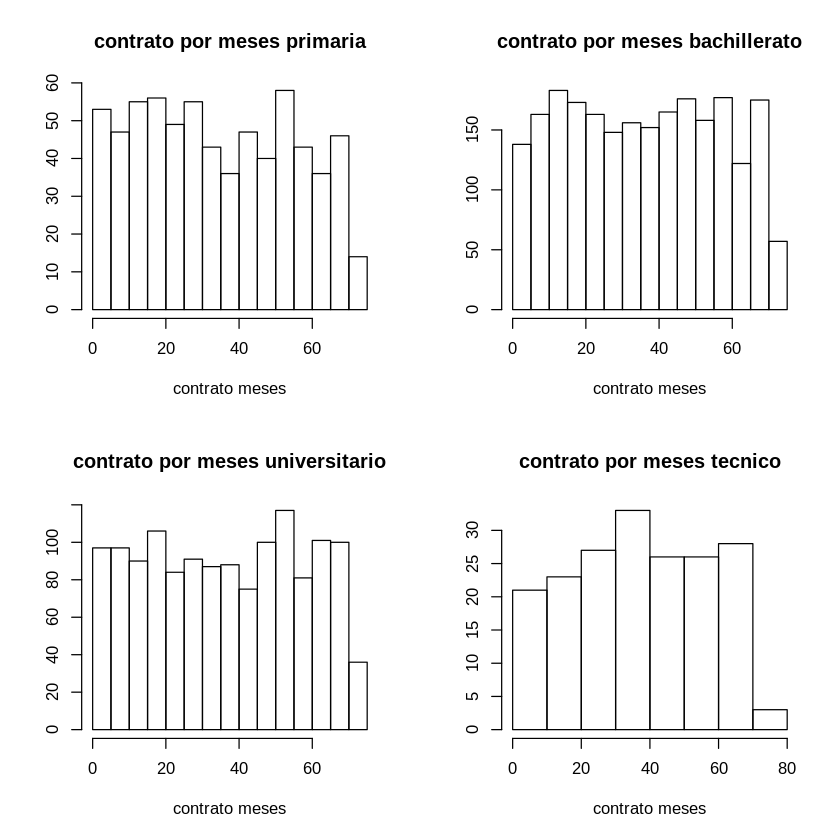

In [156]:
par(mfrow=c(2,2))
hist(contrato_meses[nivel_educativo=="primaria"], main="contrato por meses primaria", xlab="contrato meses", ylab="")
hist(contrato_meses[nivel_educativo=="bachillerato"], main="contrato por meses bachillerato", xlab="contrato meses", ylab="")
hist(contrato_meses[nivel_educativo=="universitario"], main="contrato por meses universitario", xlab="contrato meses", ylab="")
hist(contrato_meses[nivel_educativo=="técnico"], main="contrato por meses tecnico", xlab="contrato meses", ylab="")

In [157]:
paste('Asimetria de meses por personas con nivel educativo de primaria:', skew(contrato_meses[nivel_educativo =="primaria"]))
paste('Curtosis de meses por personas con nivel educativo de primaria:', kurtosi(contrato_meses[nivel_educativo=="primaria"]))
paste('Asimetria de meses por personas con nivel educativo de bachillerato: ', skew(contrato_meses[nivel_educativo=="bachillerato"]))
paste('Curtosis de meses por personas con nivel educativo de bachillerato: ', kurtosi(contrato_meses[nivel_educativo=="bachillerato"]))
paste('Asimetria de meses por personas con nivel educativo de universitario: ', skew(contrato_meses[nivel_educativo=="universitario"]))
paste('Curtosis de meses por personas con nivel educativo de universitario: ', kurtosi(contrato_meses[nivel_educativo=="universitario"]))
paste('Asimetria de meses por personas con nivel educativo de tecnicas: ', skew(contrato_meses[nivel_educativo=="técnico"]))
paste('Curtosis de meses por personas con nivel educativo de tecnicas: ', kurtosi(contrato_meses[nivel_educativo=="técnico"]))

[1] "Asimetria de meses por personas con nivel educativo de primaria: 0.0957847232422846"

[1] "Curtosis de meses por personas con nivel educativo de primaria: -1.21771109644923"

[1] "Asimetria de meses por personas con nivel educativo de bachillerato:  0.0155346600124627"

[1] "Curtosis de meses por personas con nivel educativo de bachillerato:  -1.2010008555991"

[1] "Asimetria de meses por personas con nivel educativo de universitario:  -0.0245239715759109"

[1] "Curtosis de meses por personas con nivel educativo de universitario:  -1.25384621936983"

[1] "Asimetria de meses por personas con nivel educativo de tecnicas:  -0.0590691425113468"

[1] "Curtosis de meses por personas con nivel educativo de tecnicas:  -1.09424531551564"

Como podemos ver los datos de las personas el nivel de curtosis se comporta de una manera muy similar siendo negativa para los 4 casos por ende sojn del tipo mesocúrtica. 
Para el nivel de asimetria hay dos variaciones:
1. Para el nivel de primaria y de bachillerato se comporta de manera similar siendo levemente positiva para ambos casos
2. Para el nivel universitario y tecnico se comporta de manera similar siendo negativa para ambos casos

#### 9. Estado civil vs contrato meses

A continuacion se dan los resultados de las medidas de tendencia central y posicion para el numero de meses de contnrato y su estado civil.

Como se puede ver las diferentes medidas como la media, mediana y la moda estan muy cercanas entre si pero hay un valor en particular y es que las personas que mas solicitan son las personas casadas que han tenido un contrado de 67 meses de redsto las personas divorciadas y solteras que mas son solicitadas estan entre 52 y 54 messes

In [158]:
#Tendencia central y posicion
paste('Media de casado:', mean(contrato_meses[est_civil=="casado"]))
paste('Media de divorciado:', mean(contrato_meses[est_civil=="divorciado"]))
paste('Media de soltero:', mean(contrato_meses[est_civil=="soltero"]))
paste('Mediana de casado:', median(contrato_meses[est_civil=="casado"]))
paste('Mediana de divorciado:', median(contrato_meses[est_civil=="divorciado"]))
paste('Mediana de soltero:', median(contrato_meses[est_civil=="soltero"]))
paste('Moda de casado:', mfv(contrato_meses[est_civil=="casado"]))
paste('Moda de divorciado:', mfv(contrato_meses[est_civil=="divorciado"]))
paste('Moda de soltero:', mfv(contrato_meses[est_civil=="soltero"]))
print('Quantiles:')
quantile(contrato_meses[est_civil=="casado"]) 
quantile(contrato_meses[est_civil=="divorciado"]) 
quantile(contrato_meses[est_civil=="soltero"]) 

[1] "Media de casado: 36.3750446907401"

[1] "Media de divorciado: 36.7878787878788"

[1] "Media de soltero: 35.8035117056856"

[1] "Mediana de casado: 36"

[1] "Mediana de divorciado: 37"

[1] "Mediana de soltero: 35.5"

[1] "Moda de casado: 67"

[1] "Moda de divorciado: 54"

[1] "Moda de soltero: 52"

[1] "Quantiles:"


0%  25%  50%  75% 100% 
   1   18   36   54   72

0%   25%   50%   75%  100% 
 1.00 18.75 37.00 55.00 72.00

0%  25%  50%  75% 100% 
 1.0 18.0 35.5 54.0 72.0

Con los datos de dispersion que se comportan de manera similar

In [159]:
#Dispersión:
paste('Rango del contrato en meses en personas casado', range(contrato_meses[est_civil=="casado"]))
paste('Rango del contrato en meses en personas divorciado', range(contrato_meses[est_civil=="divorciado"]))
paste('Rango del contrato en meses en personas soltero', range(contrato_meses[est_civil=="soltero"]))
paste('Rango intercuartilico del contrato en meses en personas casado', IQR(contrato_meses[est_civil=="casado"]))
paste('Rango intercuartilico del contrato en meses en personas divorciado', IQR(contrato_meses[est_civil=="divorciado"]))
paste('Rango intercuartilico del contrato en meses en personas soltero', IQR(contrato_meses[est_civil=="soltero"]))
paste('Varianza del contrato en meses en personas casados', var(contrato_meses[est_civil=="casado"]))
paste('Varianza del contrato en meses en personas divorciados', var(contrato_meses[est_civil=="divorciado"]))
paste('Varianza del contrato en meses en personas solteros', var(contrato_meses[est_civil=="soltero"]))

[1] "Rango del contrato en meses en personas casado 1" 
[2] "Rango del contrato en meses en personas casado 72"

[1] "Rango del contrato en meses en personas divorciado 1" 
[2] "Rango del contrato en meses en personas divorciado 72"

[1] "Rango del contrato en meses en personas soltero 1" 
[2] "Rango del contrato en meses en personas soltero 72"

[1] "Rango intercuartilico del contrato en meses en personas casado 36"

[1] "Rango intercuartilico del contrato en meses en personas divorciado 36.25"

[1] "Rango intercuartilico del contrato en meses en personas soltero 36"

[1] "Varianza del contrato en meses en personas casados 425.619305479046"

[1] "Varianza del contrato en meses en personas divorciados 442.095336668392"

[1] "Varianza del contrato en meses en personas solteros 434.343786820783"

Desviacion estandar

In [160]:
paste('En número de meses del contrato de las personas casadas estan desviados de la media un: ', sd(contrato_meses[est_civil=="casado"]), 'de la muestra')
paste('En número de meses del contrato de las personas divorciadas estan desviados de la media un: ', sd(contrato_meses[est_civil=="divorciado"]), 'de la muestra')
paste('En número de meses del contrato de las personas solteras estan desviados de la media un: ', sd(contrato_meses[est_civil=="soltero"]), 'de la muestra')

[1] "En número de meses del contrato de las personas casadas estan desviados de la media un:  20.6305430243376 de la muestra"

[1] "En número de meses del contrato de las personas divorciadas estan desviados de la media un:  21.0260632708168 de la muestra"

[1] "En número de meses del contrato de las personas solteras estan desviados de la media un:  20.8409161703794 de la muestra"

In [ ]:
par(mfrow=c(2,2))
hist(contrato_meses[est_civil=="casado"]
paste('Asimetria de la edad de los que aceptaron la tarjeta: ', skew(edad[aceptacion_TC=="si"]))
hist(contrato_meses[est_civil=="divorciado"], main="contrato por meses cli divorsiados", xlab="contrato meses", ylab="")
hist(contrato_meses[est_civil=="soltero"], main="contrato por meses cli solteros", xlab="contrato meses", ylab="")

In [ ]:
paste('Asimetria de meses por personas con estado civil casadas:', skew(contrato_meses[est_civil=="casado"]))
paste('Curtosis de meses por personas con estado civil casadas:', kurtosi(contrato_meses[est_civil=="casado"]))
paste('Asimetria de meses por personas con estado civil divorciadas: ', skew(contrato_meses[est_civil=="divorciado"]))
paste('Curtosis de meses por personas con estado civil divorciadas: ', kurtosi(contrato_meses[est_civil=="divorciado"]))
paste('Asimetria de meses por personas con estado civil solteras: ', skew(contrato_meses[est_civil=="soltero"]))
paste('Curtosis de meses por personas con estado civil solteras: ', kurtosi(contrato_meses[est_civil=="soltero"]))

Como podemos ver los datos de las personas casadas, divorciadas, solteras se comportan de manera casi simetrica al ser cercana a cero, con una leve tendencia asimetria positiva y es del tipo platicurtica. La asimetria de las personas casadas se comportan de manera mas simetrica


#Conclusiones

## Personas que aceptaron
Las personas que aceptan la tarjeta del banco tienden a ser jovenes, es decir, de 32 años aunque el promedio de la edad de aceptación de la tarjeta es de 42 años. De la duración en segundos de la llamada, podemos decir que la mayoria de los aceptaron la tarjeta tuvieron una duracion de llamada de 182 s, aunque en promedio tuvieron una llamada de 476 s. En promedio las personas aceptaron la tarjeta en el segundo contacto y la mayoría en el primero y en general no estuvieron en campañas previas. En tanto al número de meses del contrato de los clientes, en su promedio tienen un contrato de 38 meses y este número de meses es el más frecuente, lo que nos habla de una estabilidad laboral de los clientes. 

## Personas que no aceptaron
La edad promedio de las personas que no aceptaron son de 41 años y mayoritariamente las personas de 34 años, es decir, se comporta de una manera muy similar a la edad de las personas que aceptaron. En tanto al número de meses sabemos que en promedio las personas que no aceptaron la tarjeta tienen un contrato de 36 meses y la mayoría tienen un contrato de 56 meses, lo que nos muestra que si se aumenta la durabilidad del contrato demasiado, son las que menos aceptan la tarjeta. La duración en segundos de la llamada en promedio es 177 s y en su mayoría 123 s, lo que nos dice, que entre menos dure la llamada, es más probable que no se acepte la tarjeta. Lo que inferimos del número de veces que se contacto con el cliente, fue que se negaron en promedio en el segundo contacto y en su mayoría en el primero. Por ultimo en este caso, las personas en su mayoria y en promedio no tuvieron contacto previo con otras promociones de la tarjeta. 